<a href="https://colab.research.google.com/github/Navneet2409/credit-card-default-prediction/blob/main/Credit_Card_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction**



##### **Project Type**    - Classification Algorithm
##### **Contribution**    - Individual


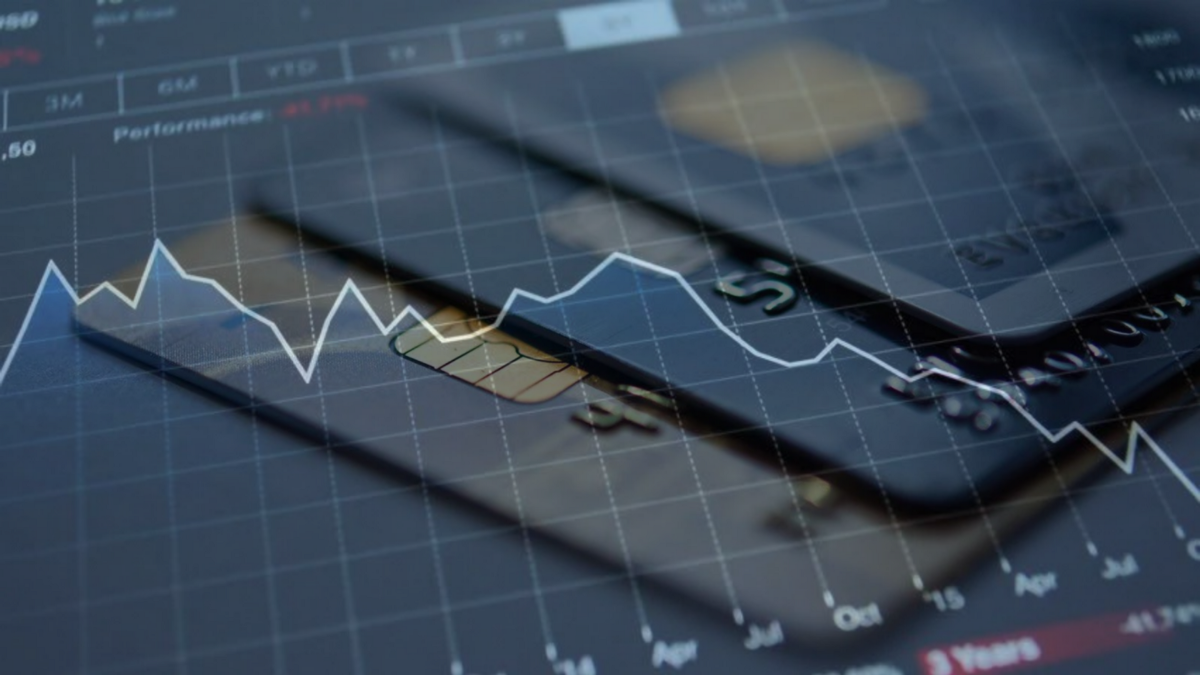

# **GitHub Link -**

https://github.com/Navneet2409/credit-card-default-prediction

# **Project Summary -**

The aim of a credit card default prediction project is to develop a machine learning model that can accurately predict which credit card users are likely to default on their payments in the future. The model should use historical data of credit card users such as their payment history, credit limit, age, education, and other demographic information to identify patterns and trends that can help predict default behavior. The project focuses on utilizing historical data of Customer's default payment in Taiwan.

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Building
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets.

A credit card issuer based in Taiwan wants to learn more about how likely its customers are to default on their payments and the main factors that influence this probability. The issuer's decisions regarding who to issue a credit card to and what credit limit to offer would be informed by this information. The issuer's future strategy, including plans to offer targeted credit products to their customers, would be informed by a better understanding of their current and potential customers as a result of this.

**Our objective**
* To determine the main factors that influence the likelihood of defaulting on a credit card.
* To determine the likelihood that Bank customers will default on their credit card payments.


### **Business Context** 
The goal of credit card default prediction is to help credit card companies and lenders to better manage their risk and minimize losses. By predicting which credit card users are likely to default on their payments, lenders can take proactive steps to mitigate the risk, such as offering lower credit limits, higher interest rates, or other measures to reduce the risk of default.

Overall, credit card default prediction is an important tool for lenders to manage risk and ensure the stability of the credit card industry. It relies on sophisticated machine learning algorithms to analyze large volumes of historical data and make accurate predictions about future credit card payment behavior.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# load the Default of Credit Card Clients data set from the drive
clients_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Credit Card Default Prediction - Navneet Keshri/default of credit card clients.csv',header = 1)

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
clients_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns 
clients_df.shape

(30000, 25)

In [ ]:
print(f'number of rows : {clients_df.shape[0]}  \nnumber of columns : {clients_df.shape[1]}')

number of rows : 30000  
number of columns : 25


### Dataset Information

In [ ]:
# Dataset Info
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We have 25 columns. All of them are numerical as of now but we have to check for categorical data if there is any.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value=len(clients_df[clients_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


<AxesSubplot:>

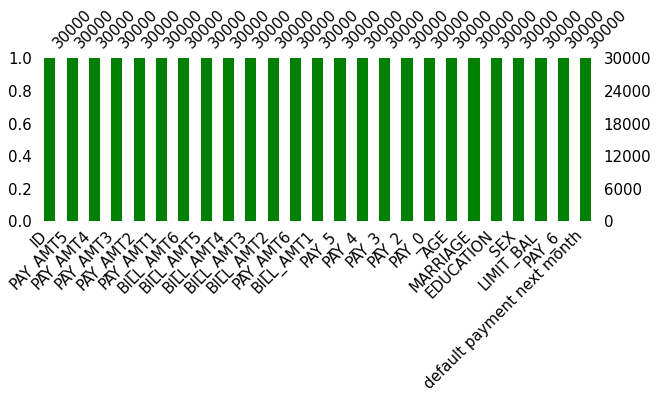

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(clients_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<AxesSubplot:>

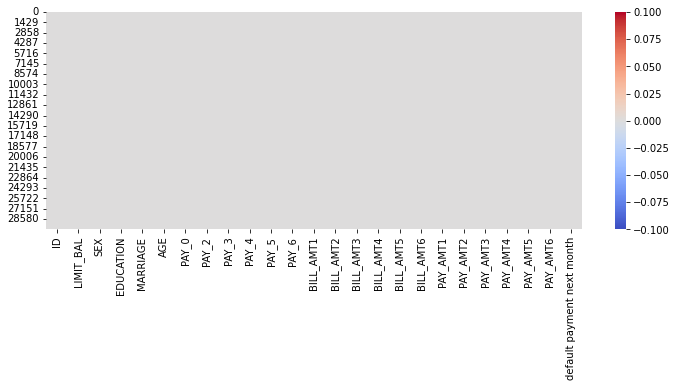

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(clients_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

There are 30000 rows and 25 columns in the dataset. The dataset does not contain any duplicate or missing values.

The given dataset is from the banking industry. Our task is to examine customer credit default and its causes.The proactive identification of customers most likely to default on loan payments is the first step in predicting customer loan default. This is typically done by dynamically analyzing pertinent customer data and actions.



## **3. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

###  Statistical Summary

In [ ]:
# Dataset Describe
clients_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

###  Variables Description

The dataset contains data from credit card indistry in Taiwan and has collected the usage, historical payments and default status of the customers.


**Attribute Information:**

* **ID	:** ID of each client
* **LIMIT_BAL	:** Amount of given credit in NT dollars 
* **SEX	:** Gender (1=male, 2=female)
* **EDUCATION	:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE	:** Marital status (1=married, 2=single, 3=others)
* **AGE	:** Age in years
* **PAY_0	:** Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2	:** Repayment status in August, 2005 (scale same as above)
* **PAY_3	:** Repayment status in July, 2005 (scale same as above)
* **PAY_4	:** Repayment status in June, 2005 (scale same as above)
* **PAY_5	:** Repayment status in May, 2005 (scale same as above)
* **PAY_6	:** Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1	:** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2	:** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3	:** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4	:** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5	:** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6	:** Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1	:** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2	:** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3	:** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4	:** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5	:** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6	:** Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month	:** Default payment (1=yes, 0=no)

### Unique Values

In [ ]:
# print the unique value
clients_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in clients_df.columns.tolist():
  print("No. of unique values in ",i,"is",clients_df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

### Observations: 

* We are focusing on several key columns of our dataset, including 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', and 'PAY_AMT' as they contain a wealth of information.
* By utilizing these features, we plan to create a classification model and implement various classification algorithms. 


## **4. EDA**

#### **What is EDA?**
* Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.


### **4.1 Renaming Features**

In [ ]:
# Renaming complex columns name for the sake of simplicity    **(Not a necessary step to do)**
# Changing inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DP_NEXT_MONTH'
clients_df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DP_NEXT_MONTH'},inplace = True)
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

### **4.2 Column: 'DP_NEXT_MONTH'**

Text(0.5, 1.0, 'Percentage of Default and Non-Default Payment')

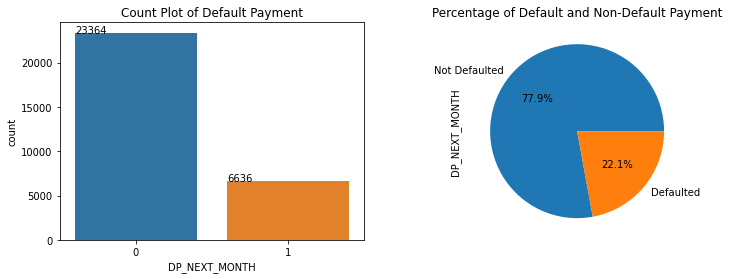

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

# Univariate analysis
# Count Plot of Default Payment
count = sns.countplot(data=clients_df, x='DP_NEXT_MONTH', ax=ax[0])
count.set_title('Count Plot of Default Payment')

# adding value count on the top of bar
for p in count.patches:
  count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Univariate analysis
# Percentage of Default and Non-Default Payment 
pie = clients_df['DP_NEXT_MONTH'].value_counts().plot(kind='pie',autopct="%1.1f%%",labels=['Not Defaulted','Defaulted'], ax=ax[1])
pie.set_title('Percentage of Default and Non-Default Payment')

**Observation:** 
* We can observe from the graphs that the number of default payments in the data is low in number compared to the number of not default payments. The count of default payments is 6636 while the count of not default payments is 23364.
* By percentage 22.1% of customers defaulted on their payment whereas 77.9% of customers do not default on their credit card payment.
* We can say that the data is highly imbalanced which we need to balance. We will do that in the feature engineering step.

### **4.3 Column: 'LIMIT_BAL'**

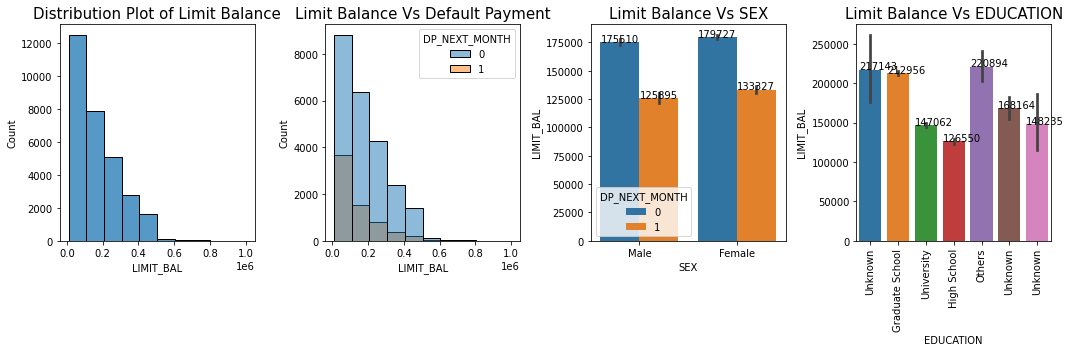

In [ ]:
fig,ax = plt.subplots(1,4, figsize=(15,5))

# Distribution analysis of Limit Balance
hist = sns.histplot(clients_df['LIMIT_BAL'],bins=10, ax=ax[0])
hist.set_title('Distribution Plot of Limit Balance', size=15)

# Bi-variate analysis
# Limit Balance Vs Default Payment
hist = sns.histplot(data=clients_df, x='LIMIT_BAL', hue='DP_NEXT_MONTH',bins=10, ax=ax[1])
hist.set_title('Limit Balance Vs Default Payment', size=15)

# Multi-variate analysis
# Limit Balance Vs SEX
bar = sns.barplot(data=clients_df, x='SEX', y='LIMIT_BAL',hue='DP_NEXT_MONTH', ax=ax[2])
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

# Bi-variate analysis
# Limit Balance Vs EDUCATION
bar = sns.barplot(data=clients_df, x='EDUCATION', y='LIMIT_BAL', ax=ax[3])
bar.set_title('Limit Balance Vs EDUCATION', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])

# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:** 
* Most of the customers get up to 2 lakhs of credit limit balance.
* There appears to be a negative correlation between the percentage of defaults and credit limit.
* On average females gets more limit than males. The female has an average of 170k while the male has an average of 163k.
* Graph also indicates that higher education means a higher credit limit. We have to categorize all the unknown education categories as one.

### **4.4 Column: 'SEX'**

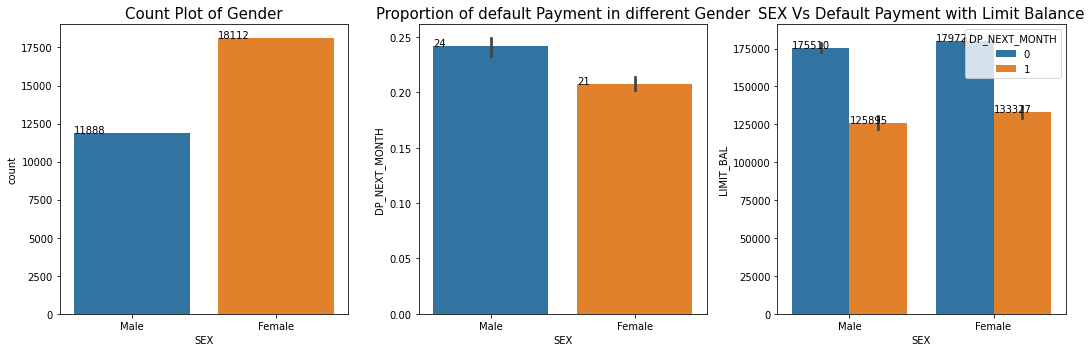

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(clients_df['SEX'], ax=ax[0])
count.set_title('Count Plot of Gender', size=15)

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
count.set_xticklabels(['Male', 'Female'])


# Bi-variate analysis
# SEX Vs Default Payment
bar = sns.barplot(data=clients_df, x='SEX', y='DP_NEXT_MONTH', ax=ax[1])
bar.set_title('Proportion of default Payment in different Gender', size=15)

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Multi-variate analysis
# SEX Vs Default Payment with Limit Balance
bar = sns.barplot(data=clients_df, x='SEX', y='LIMIT_BAL', hue='DP_NEXT_MONTH', ax=ax[2])
bar.set_title('SEX Vs Default Payment with Limit Balance', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

plt.tight_layout()
plt.show()

**Observation:** 
* There are 18112 females and 11888 males in the data set.
* About 24% percent of males defaulted and about 21% of the female defaulted.
* Number of males who defaulted is less in number but the proportion is greater. It might be possible because males have fewer credit limits on their credit cards as we can see in the graph too.

### **4.5 Column: 'EDUCATION'**

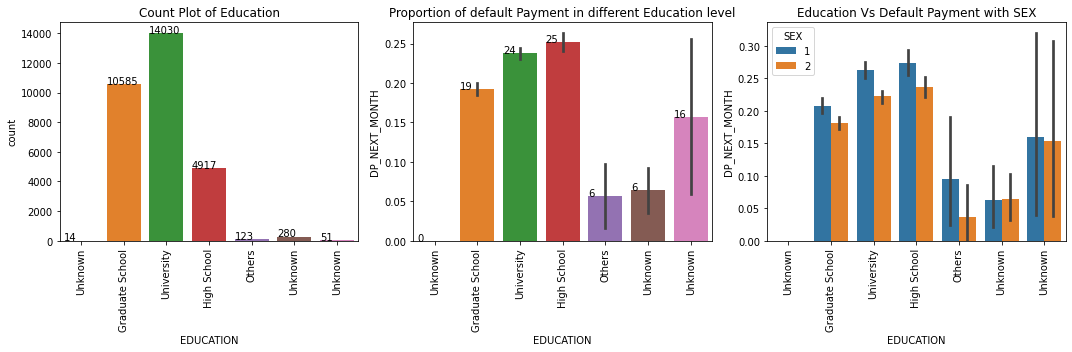

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(clients_df['EDUCATION'], ax=ax[0])
count.set_title('Count Plot of Education')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
count.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'], rotation=90)


# Bi-variate analysis
# EDUCATION Vs Default Payment
bar = sns.barplot(data=clients_df, x='EDUCATION', y='DP_NEXT_MONTH', ax=ax[1])
bar.set_title('Proportion of default Payment in different Education level')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'], rotation=90)


# Multi-variate analysis
# EDUCATION Vs Default Payment with SEX
bar = sns.barplot(data=clients_df, x='EDUCATION', y='DP_NEXT_MONTH', hue='SEX', ax=ax[2])
bar.set_title('Education Vs Default Payment with SEX')

# Assign labels to the x-axis categories   
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'], rotation=90)

plt.tight_layout()
plt.show()

**Observation:** 

* 10,585 people with degrees from graduate schools; 14,030 individuals with college degrees; 4,917 people with high school degrees. Count of customers who has completed University is most in numbers followed by Graduate School and High School.
* With the rise in education level proportion of default decreases. We can see that Graduate School education level customers defaulted by 19% while University Education level customer default percentage is 24% followed by High School with 25%.
* In almost all education levels females have less default percentage than males. 

### **4.6 Column: 'MARRIAGE'**

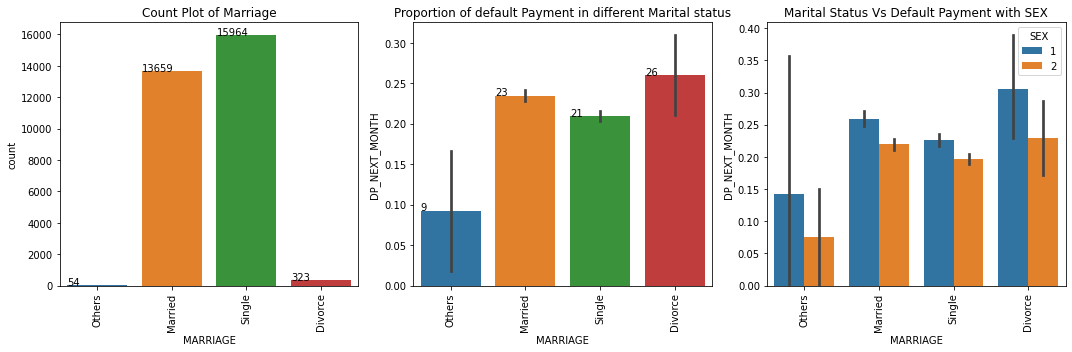

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(clients_df['MARRIAGE'], ax=ax[0])
count.set_title('Count Plot of Marriage')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)     
count.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)


# Bi-variate analysis
# MARRIAGE Vs Default Payment
bar = sns.barplot(data=clients_df, x='MARRIAGE', y='DP_NEXT_MONTH', ax=ax[1])
bar.set_title('Proportion of default Payment in different Marital status')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)


# Multi-variate analysis
# MARRIAGE Vs Default Payment with SEX
bar = sns.barplot(data=clients_df, x='MARRIAGE', y='DP_NEXT_MONTH', hue='SEX', ax=ax[2])
bar.set_title('Marital Status Vs Default Payment with SEX')

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)

plt.tight_layout()
plt.show()

**Observation:** 

* 13,659 people who are married; 15,964 single people; 323 people who divorced; 54 people who are considered "others." Count of customers who are single is most in numbers followed by married and divorced.
* The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).
* In all Marital status females have less default percentage than males. 






### **4.7 Column: 'AGE'**

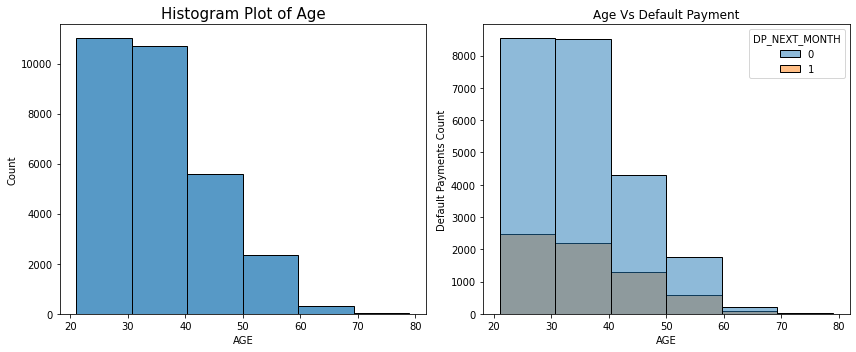

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

# Distribution analysis of Age
hist = sns.histplot(clients_df['AGE'],bins=6, ax=ax[0])
hist.set_title('Histogram Plot of Age', size=15)

# Bi-variate analysis
# Age Vs Default Payment
hist = sns.histplot(data=clients_df, x='AGE', hue='DP_NEXT_MONTH', bins=6, ax=ax[1])
hist.set(title='Age Vs Default Payment',ylabel='Default Payments Count')

plt.tight_layout()
plt.show()

**Observation:** 

* With the increase in age the count of customers decreases. Most of the customers belong to the 20-30 year age group followed by the 30-40 age group.
* With an increase in the age group the count of default payments decreases. 

### **4.8 Columns: 'Payment History'**

In [ ]:
# Melt the dataset to transform the categorical columns to rows
melted_df = clients_df.melt(value_vars=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], var_name='Category', value_name='Value')

# Group the data by category and value and count the number of occurrences
grouped_df = melted_df.groupby(['Category', 'Value']).size().reset_index(name='Count')

# Create a dictionary to rename old values to new values
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months,
# … 8=payment delay for eight months, 9=payment delay for nine months and above)
value_map = {-2:'no consumption', -1:'paid', 0:'revolving credit', 1:'1 month delay', 2:'2 month delay', 3:'3 month delay',
              4:'4 month delay', 5:'5 month delay', 6:'6 month delay', 7:'7 month delay', 8:'8 month delay', 9:'9 month and more delay'}

# Replace the old values with the new values
grouped_df['Value'] = grouped_df['Value'].replace(value_map)

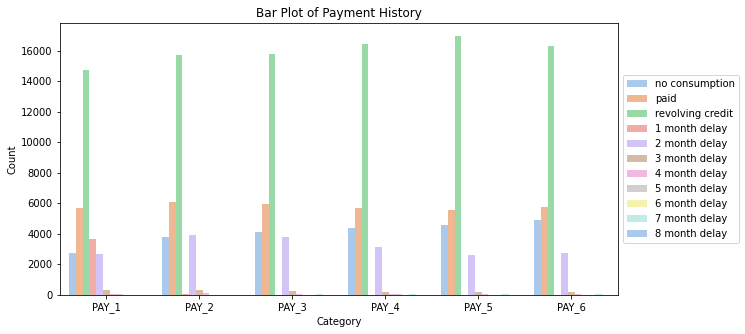

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Univariate analysis
bar = sns.barplot(data=grouped_df, x='Category', y='Count',palette='pastel', hue='Value')
bar.set_title('Bar Plot of Payment History')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

**Observation:** 

* In every month's payment history, most customers are from revolving credit followed by paid.
* Customers with payment delay in all the payment history have the most number in 2-month payment delay means a 2-month payment delay is a critical sign of the default of the payment.

### **4.9 Columns: 'Bill Amounts'**

In [ ]:
# Creating few columns to consolidate all the bill amounts
clients_df['Sum_all_bill'] = clients_df['BILL_AMT1']+clients_df['BILL_AMT2']+clients_df['BILL_AMT3']+\
                             clients_df['BILL_AMT4']+clients_df['BILL_AMT5']+clients_df['BILL_AMT6']

clients_df['Avg_bill'] =    (clients_df['BILL_AMT1']+clients_df['BILL_AMT2']+clients_df['BILL_AMT3']+\
                             clients_df['BILL_AMT4']+clients_df['BILL_AMT5']+clients_df['BILL_AMT6'])/6

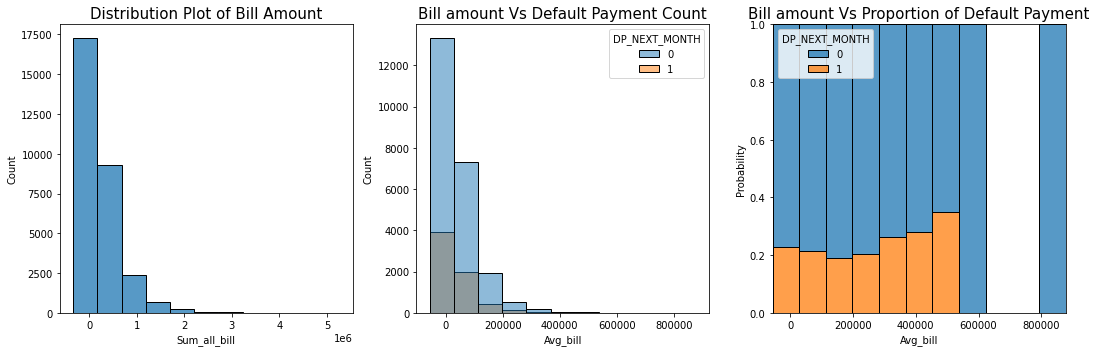

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Distribution analysis of Bill Amount
hist = sns.histplot(clients_df['Sum_all_bill'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Bill Amount', size=15)

# Bi-variate analysis
# Bill amount Vs Default Payment Count
hist = sns.histplot(data=clients_df, x='Avg_bill', hue='DP_NEXT_MONTH',bins=11, ax=ax[1])
hist.set_title('Bill amount Vs Default Payment Count', size=15)

# Bi-variate analysis
# Bill amount Vs Proportion of Default Payment
hist = sns.histplot(data=clients_df, x='Avg_bill', hue='DP_NEXT_MONTH', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Bill amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

**Observation:** 

* In all the bill amounts there are some negative bill amount records means the bill amount value is less than zero.
* Most of the defaults are from customers who have negative and up to 2 lakh bill amount on an average in the last 6 months.
* But if we compare the bill amount with default payment, the proportion of default payment rises with the rise in the average bill amount.


### **4.10 Columns: 'Pay Amounts'**

In [ ]:
# Creating few columns to consolidate all the bill amounts
clients_df['Sum_all_pay_amount'] = clients_df['PAY_AMT1']+clients_df['PAY_AMT2']+clients_df['PAY_AMT3']+\
                             clients_df['PAY_AMT4']+clients_df['PAY_AMT5']+clients_df['PAY_AMT6']

clients_df['Avg_pay_amount'] =    (clients_df['PAY_AMT1']+clients_df['PAY_AMT2']+clients_df['PAY_AMT3']+\
                             clients_df['PAY_AMT4']+clients_df['PAY_AMT5']+clients_df['PAY_AMT6'])/6

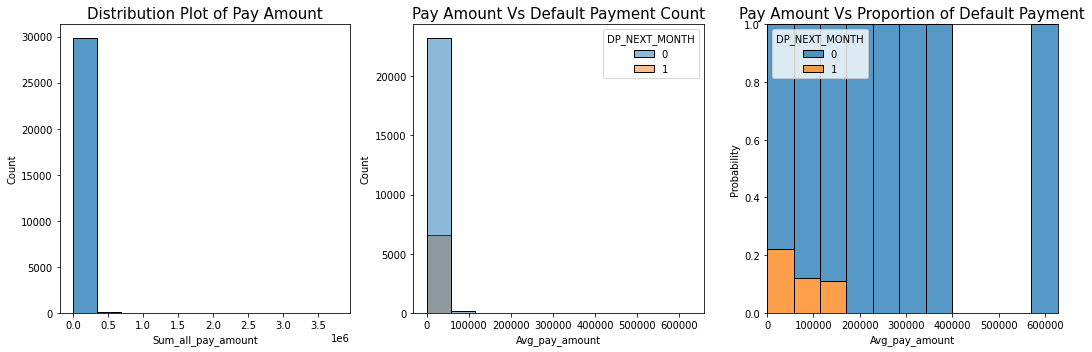

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Distribution analysis of Pay Amount
hist = sns.histplot(clients_df['Sum_all_pay_amount'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Pay Amount', size=15)

# Bi-variate analysis
# Pay amount Vs Default Payment Count
hist = sns.histplot(data=clients_df, x='Avg_pay_amount', hue='DP_NEXT_MONTH',bins=11, ax=ax[1])
hist.set_title('Pay Amount Vs Default Payment Count', size=15)

# Bi-variate analysis
# Pay amount Vs Proportion of Default Payment
hist = sns.histplot(data=clients_df, x='Avg_pay_amount', hue='DP_NEXT_MONTH', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Pay Amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

**Observation:** 

* In all the pay amounts most of the paid amount is up to 50000.
* We have seen bill amounts up to 2 lacks but the pay amount is not averaged up to 2 lakh which is obvious because default payment occurs when the customer does not pay the credit card bill.
* If we compare the pay amount with the default payment, the proportion of default payment decreases with the rise in the payment amount.


## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [ ]:
# counting duplicate values
clients_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **5.2 Missing Values**

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                    0
LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
DP_NEXT_MONTH         0
Sum_all_bill          0
Avg_bill              0
Sum_all_pay_amount    0
Avg_pay_amount        0
dtype: int64


<AxesSubplot:>

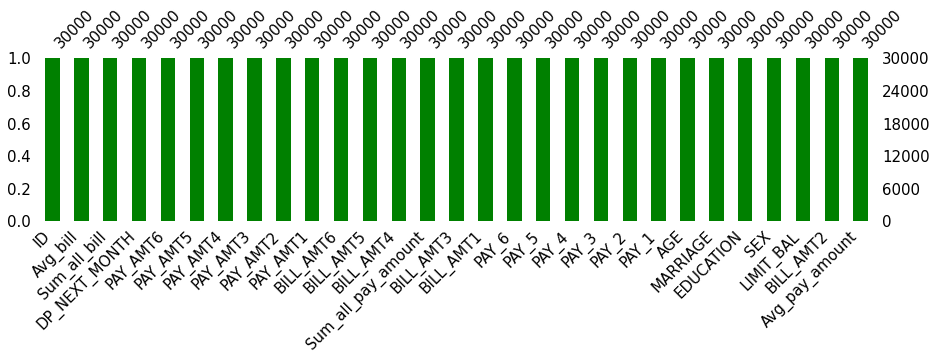

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(clients_df, color='green',sort='ascending', figsize=(15,3), fontsize=15)

Fortunately there is no missing value in the dataset

### **5.3 Skewness**

In [ ]:
# statistical summary
clients_df.describe().T

count           mean            std            min  \
ID                  30000.0   15000.500000    8660.398374       1.000000   
LIMIT_BAL           30000.0  167484.322667  129747.661567   10000.000000   
SEX                 30000.0       1.603733       0.489129       1.000000   
EDUCATION           30000.0       1.853133       0.790349       0.000000   
MARRIAGE            30000.0       1.551867       0.521970       0.000000   
AGE                 30000.0      35.485500       9.217904      21.000000   
PAY_1               30000.0      -0.016700       1.123802      -2.000000   
PAY_2               30000.0      -0.133767       1.197186      -2.000000   
PAY_3               30000.0      -0.166200       1.196868      -2.000000   
PAY_4               30000.0      -0.220667       1.169139      -2.000000   
PAY_5               30000.0      -0.266200       1.133187      -2.000000   
PAY_6               30000.0      -0.291100       1.149988      -2.000000   
BILL_AMT1           30000.0   51223.330900   73635.860576 -165580.000000   
BILL_AMT2           30000.0   49179.075167   71173.768783  -69777.000000   
BILL_AMT3           30000.0   47013.154800   69349.387427 -157264.000000   
BILL_AMT4           30000.0   43262.948967   64332.856134 -170000.000000   
BILL_AMT5           30000.0   40311.400967   60797.155770  -81334.000000   
BILL_AMT6           30000.0   38871.760400   59554.107537 -339603.000000   
PAY_AMT1            30000.0    5663.580500   16563.280354       0.000000   
PAY_AMT2            30000.0    5921.163500   23040.870402       0.000000   
PAY_AMT3            30000.0    5225.681500   17606.961470       0.000000   
PAY_AMT4            30000.0    4826.076867   15666.159744       0.000000   
PAY_AMT5            30000.0    4799.387633   15278.305679       0.000000   
PAY_AMT6            30000.0    5215.502567   17777.465775       0.000000   
DP_NEXT_MONTH       30000.0       0.221200       0.415062       0.000000   
Sum_all_bill        30000.0  269861.671200  379564.331162 -336259.000000   
Avg_bill            30000.0   44976.945200   63260.721860  -56043.166667   
Sum_all_pay_amount  30000.0   31651.392567   60827.677939       0.000000   
Avg_pay_amount      30000.0    5275.232094   10137.946323       0.000000   

                             25%            50%            75%           max  
ID                   7500.750000   15000.500000   22500.250000  3.000000e+04  
LIMIT_BAL           50000.000000  140000.000000  240000.000000  1.000000e+06  
SEX                     1.000000       2.000000       2.000000  2.000000e+00  
EDUCATION               1.000000       2.000000       2.000000  6.000000e+00  
MARRIAGE                1.000000       2.000000       2.000000  3.000000e+00  
AGE                    28.000000      34.000000      41.000000  7.900000e+01  
PAY_1                  -1.000000       0.000000       0.000000  8.000000e+00  
PAY_2                  -1.000000       0.000000       0.000000  8.000000e+00  
PAY_3                  -1.000000       0.000000       0.000000  8.000000e+00  
PAY_4                  -1.000000       0.000000       0.000000  8.000000e+00  
PAY_5                  -1.000000       0.000000       0.000000  8.000000e+00  
PAY_6                  -1.000000       0.000000       0.000000  8.000000e+00  
BILL_AMT1            3558.750000   22381.500000   67091.000000  9.645110e+05  
BILL_AMT2            2984.750000   21200.000000   64006.250000  9.839310e+05  
BILL_AMT3            2666.250000   20088.500000   60164.750000  1.664089e+06  
BILL_AMT4            2326.750000   19052.000000   54506.000000  8.915860e+05  
BILL_AMT5            1763.000000   18104.500000   50190.500000  9.271710e+05  
BILL_AMT6            1256.000000   17071.000000   49198.250000  9.616640e+05  
PAY_AMT1             1000.000000    2100.000000    5006.000000  8.735520e+05  
PAY_AMT2              833.000000    2009.000000    5000.000000  1.684259e+06  
PAY_AMT3              390.000000    1800.000000    4505.000000  8.960400e+05  
PAY

As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

In [ ]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 15 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in clients_df.columns:  
  if clients_df[col].nunique() > 15:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Sum_all_bill', 'Avg_bill', 'Sum_all_pay_amount', 'Avg_pay_amount']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DP_NEXT_MONTH']


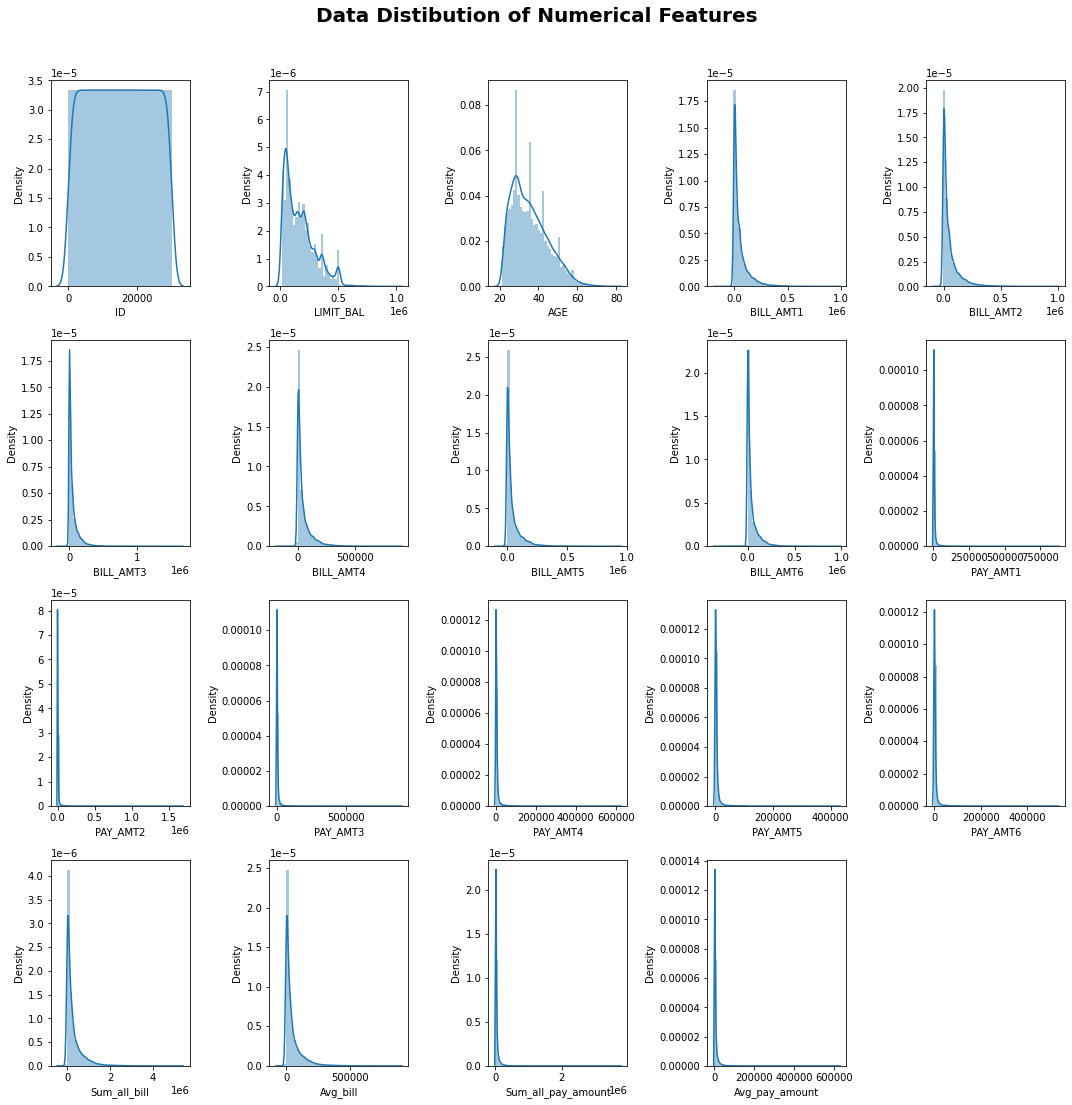

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(clients_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

**Observation:**
* For numerical features, we can see that the majority of distributions are right-skewed. The distribution of all the bill amounts and pay amounts is highly skewed to the right. It demonstrates that these columns have many outliers.
* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

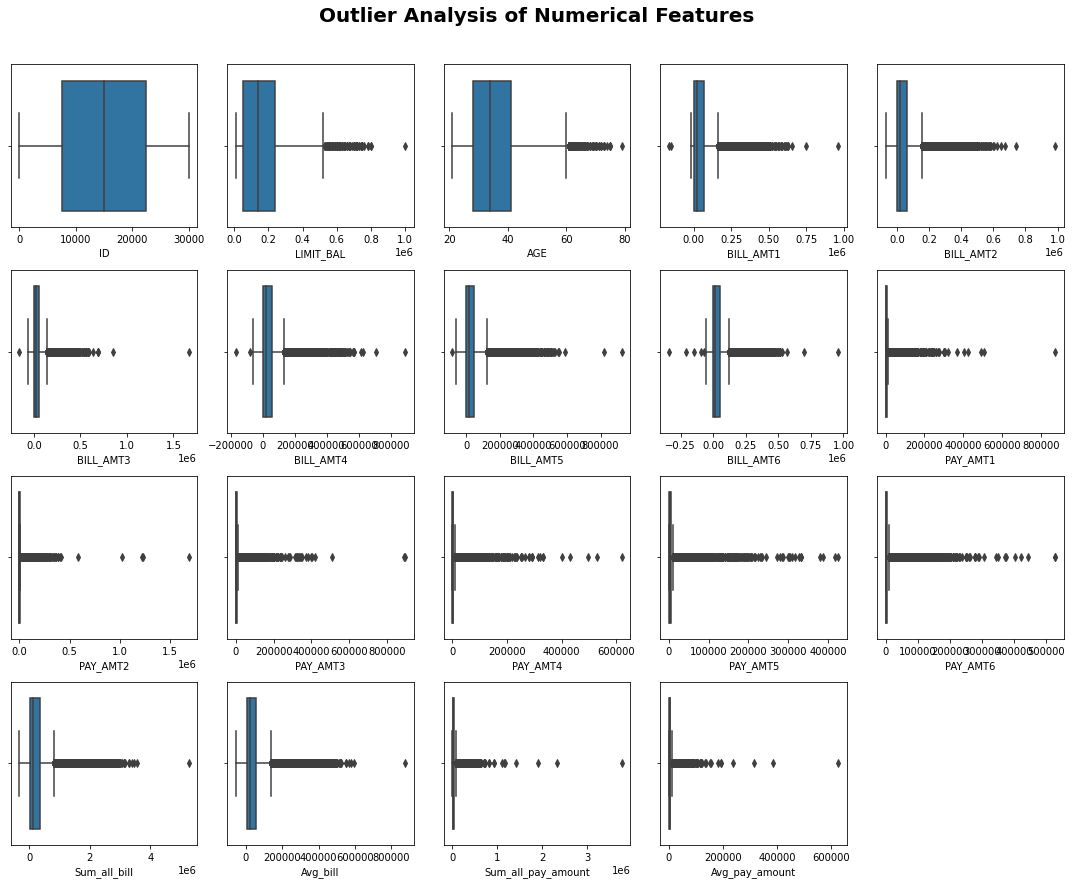

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(clients_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:** 
* Outliers are visible in the all the bill amounts features and all the pay amounts features, and 'LIMIT_BAL' columns.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(clients_df):
    for col in clients_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = clients_df[col].quantile(0.25)
        q3 = clients_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        clients_df[col] = clients_df[col].clip(lower_bound, upper_bound)
    return clients_df

In [ ]:
# using the function to treat outliers
clients_df = clip_outliers(clients_df)

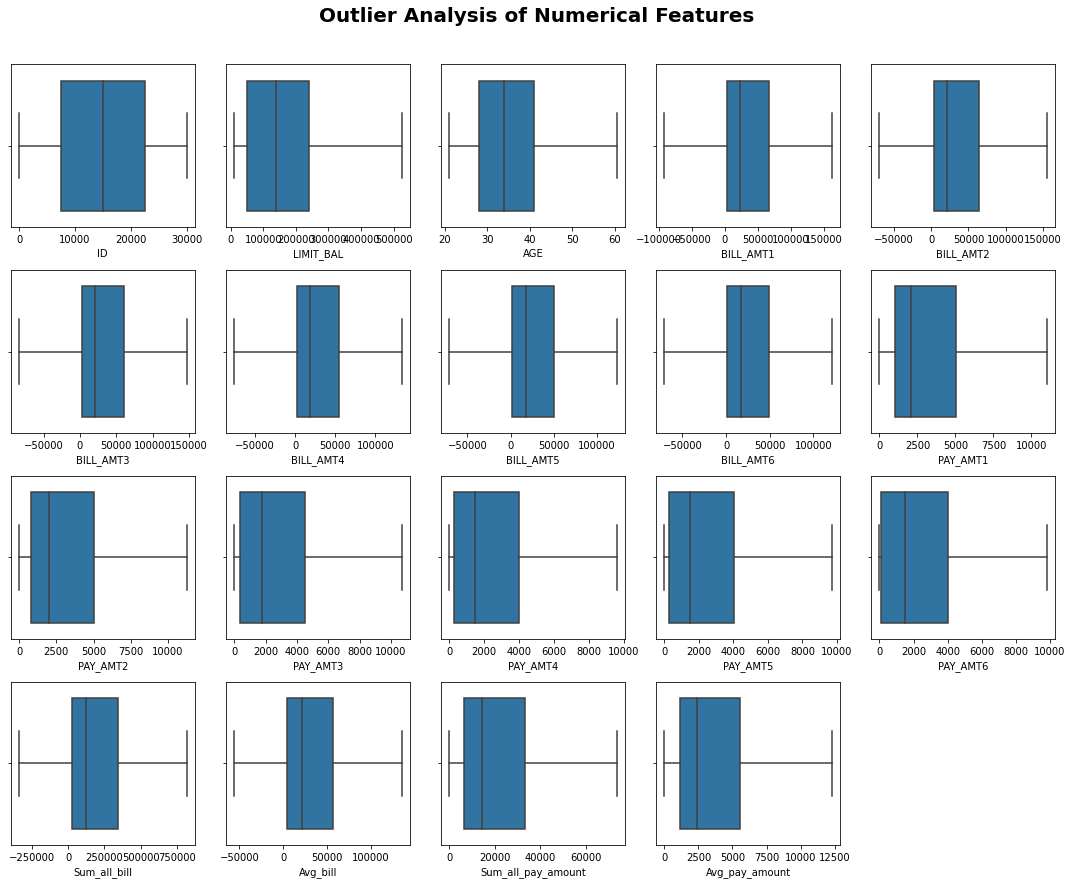

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(clients_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

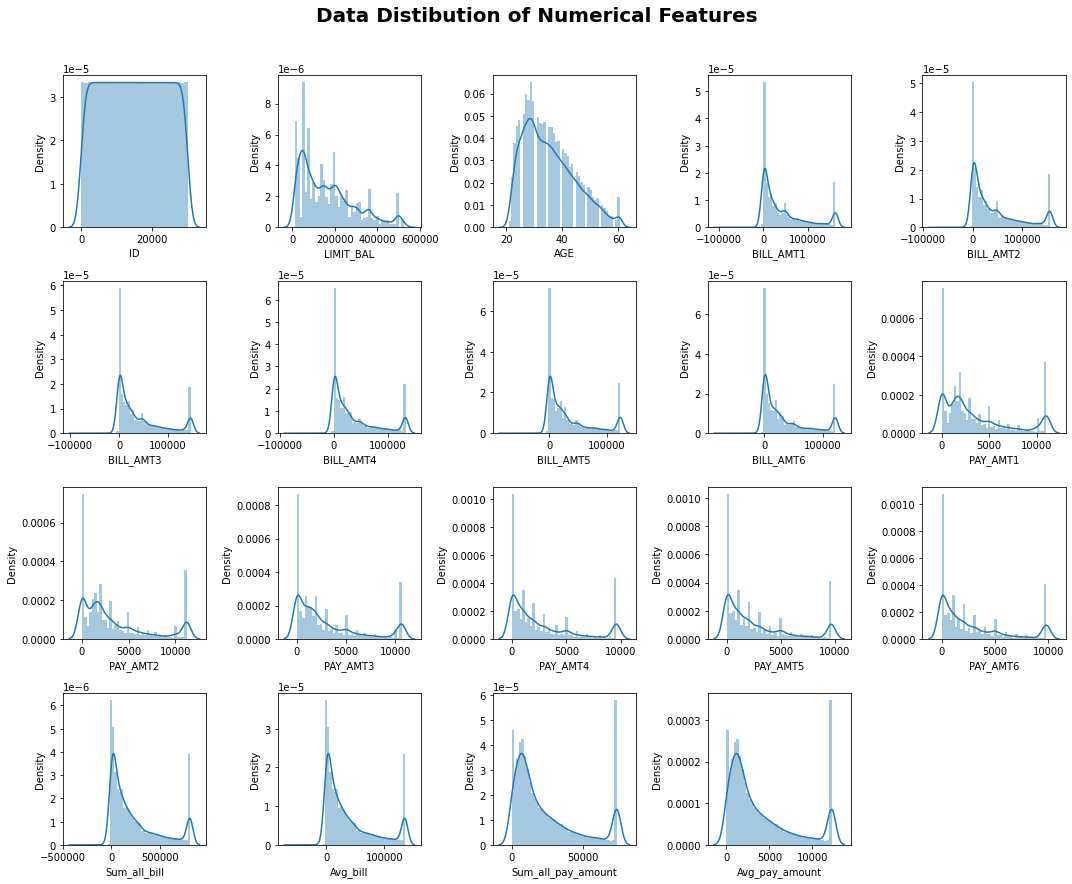

In [ ]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(clients_df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    

* We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

## **6. Feature Engineering**

* Feature engineering is the process of creating new features from existing ones to improve the performance of a machine-learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data or selecting only the most relevant features from the raw data. 
* The goal of feature engineering is to extract relevant information from the raw data and represent it in a way that can be easily understood by the machine learning model. The success of a machine learning model depends heavily on the quality of the features used as inputs, so feature engineering plays an important role in model performance.

## N

The columns "PAY_1," "PAY_2," "PAY_3," "PAY_4", "PAY_5," "PAY_6," "SEX," "EDUCATION," "MARRIAGE," and "DP_NEXT_MONTH" actually belong to the category type, even though they appear to be of the integer type. Therefore, if we do not alter this data structure, the values may mislead us during subsequent analyses.

Age is not a categorical data type but rather an integer one.



In [ ]:
# Change the int64 column into catagory column
#cols=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
#for col in cols:
#  df[col]= df[col].astype('category')

In [ ]:
# let's check the result of data type
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  category
 3   EDUCATION      30000 non-null  category
 4   MARRIAGE       30000 non-null  category
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  category
 7   PAY_2          30000 non-null  category
 8   PAY_3          30000 non-null  category
 9   PAY_4          30000 non-null  category
 10  PAY_5          30000 non-null  category
 11  PAY_6          30000 non-null  category
 12  BILL_AMT1      30000 non-null  int64   
 13  BILL_AMT2      30000 non-null  int64   
 14  BILL_AMT3      30000 non-null  int64   
 15  BILL_AMT4      30000 non-null  int64   
 16  BILL_AMT5      30000 non-null  int64   
 17  BILL_AMT6      30000 non-null  

Most of the data is 'DP_NEXT_MONTH' = 0 (do not default next month)

The column may need to be rebalanced.

In [ ]:
# 4. 'PAY_1'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_1'].value_counts()

0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_1, dtype: int64

No data wrangling is needed for 'PAY_1'.

In [ ]:
# 5. 'PAY_2'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_2'].value_counts()

0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64

No data wrangling is needed for 'PAY_2'

In [ ]:
# 6. 'PAY_3'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_3'].value_counts()

0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64

No data wrangling is needed for 'PAY_3'

In [ ]:
# 7. 'PAY_4'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_4'].value_counts()

0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64

No data wrangling is needed for 'PAY_4'

In [ ]:
# 8. 'PAY_5'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_5'].value_counts()

0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64

No data wrangling is needed for 'PAY_5'

In [ ]:
# 9. 'PAY_6'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_6'].value_counts()

0     16286
-1     5740
-2     4895
2      2766
3       184
4        49
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64

No data wrangling is needed for 'PAY_6'

#### Checking Numerical columns


Creating a function to understand numerical columns

In [ ]:
def inspect_num_column(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot and summary statistics'''

  # Display boxplot and histogram/kde.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()

  # Print summary statistics.
  print('Min: \t\t\t {:,.0f}'.format(input_series.min()))
  print('Lower Quartile: \t {:,.0f}'.format(input_series.quantile([.25]).iloc[0]))
  print('median: \t\t {:,.0f}'.format(input_series.median()))
  print('mean: \t\t\t {:,.0f}'.format(input_series.mean()))
  print('Upper Quartile: \t {:,.0f}'.format(input_series.quantile([.75]).iloc[0]))                                    
  print('max: \t\t\t {:,.0f}'.format(input_series.max()))
  print('\n')
  print('Skew: \t\t\t {:,.2f}'.format(input_series.skew()))
  print('Kurtosis: \t\t {:,.2f}'.format(input_series.kurtosis()))

  return None

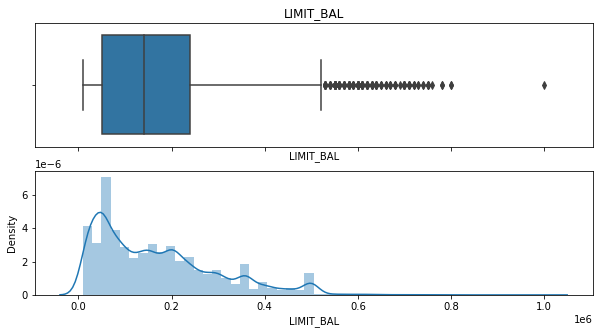

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 167,484
Upper Quartile: 	 240,000
max: 			 1,000,000


Skew: 			 0.99
Kurtosis: 		 0.54


In [ ]:
# 1. 'LIMIT_BAL'
# Amount of the given credit (NT dollar)
input_series = df['LIMIT_BAL']
inspect_num_column(input_series)

The column may need to be rebalanced.

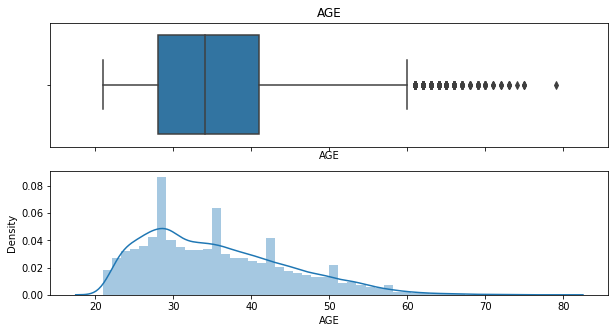

Min: 			 21
Lower Quartile: 	 28
median: 		 34
mean: 			 35
Upper Quartile: 	 41
max: 			 79


Skew: 			 0.73
Kurtosis: 		 0.04


In [ ]:
# 2. 'AGE'
# Amount of the given credit (NT dollar)
input_series = df['AGE']
inspect_num_column(input_series)

No data wrangling is needed for 'AGE'

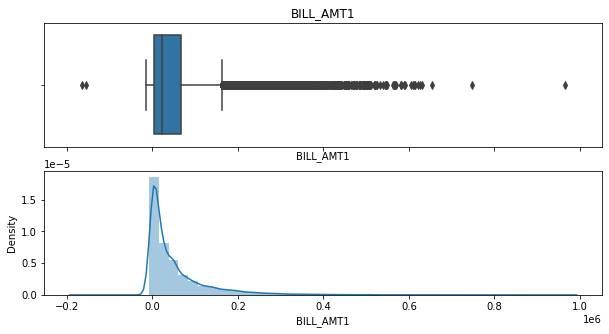

Min: 			 -165,580
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 51,223
Upper Quartile: 	 67,091
max: 			 964,511


Skew: 			 2.66
Kurtosis: 		 9.81


In [ ]:
# 3. 'BILL_AMT1'
# Amount of bill statement in September, 2005 (NT dollar)
input_series = df['BILL_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

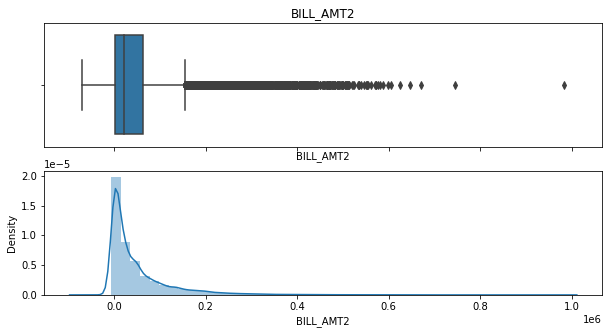

Min: 			 -69,777
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 49,179
Upper Quartile: 	 64,006
max: 			 983,931


Skew: 			 2.71
Kurtosis: 		 10.30


In [ ]:
# 4. 'BILL_AMT2'
# Amount of bill statement in August, 2005 (NT dollar)
input_series = df['BILL_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

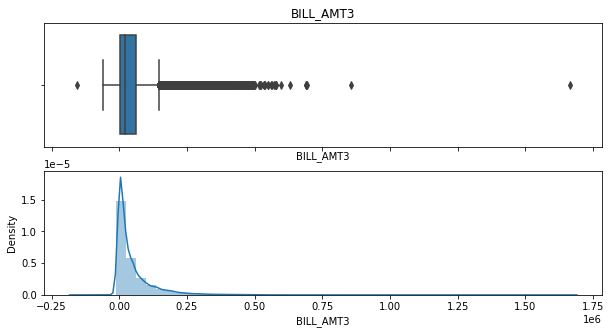

Min: 			 -157,264
Lower Quartile: 	 2,666
median: 		 20,088
mean: 			 47,013
Upper Quartile: 	 60,165
max: 			 1,664,089


Skew: 			 3.09
Kurtosis: 		 19.78


In [ ]:
# 5. 'BILL_AMT3'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

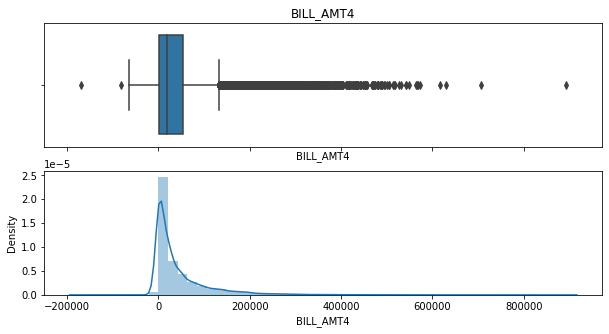

Min: 			 -170,000
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 43,263
Upper Quartile: 	 54,506
max: 			 891,586


Skew: 			 2.82
Kurtosis: 		 11.31


In [ ]:
# 6. 'BILL_AMT4'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

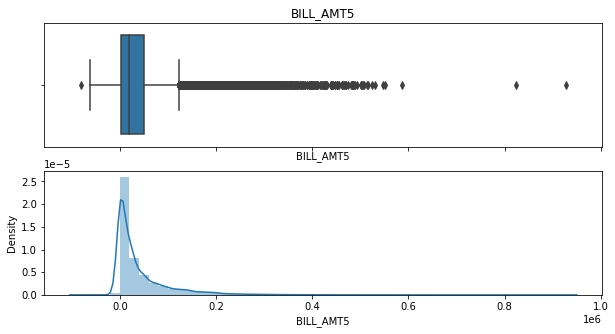

Min: 			 -81,334
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 40,311
Upper Quartile: 	 50,190
max: 			 927,171


Skew: 			 2.88
Kurtosis: 		 12.31


In [ ]:
# 7. 'BILL_AMT5'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

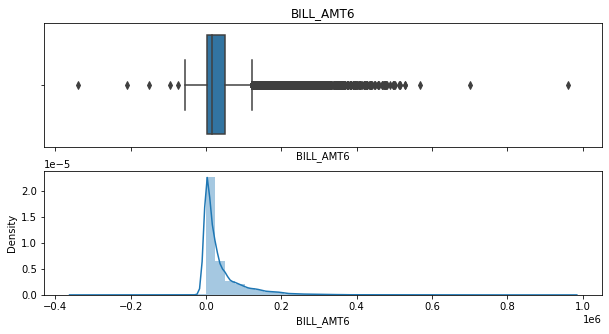

Min: 			 -339,603
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 38,872
Upper Quartile: 	 49,198
max: 			 961,664


Skew: 			 2.85
Kurtosis: 		 12.27


In [ ]:
# 8. 'BILL_AMT6'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

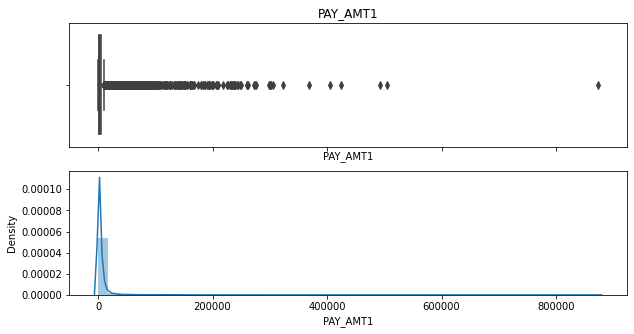

Min: 			 0
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 5,664
Upper Quartile: 	 5,006
max: 			 873,552


Skew: 			 14.67
Kurtosis: 		 415.25


In [ ]:
# 9. 'PAY_AMT1'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

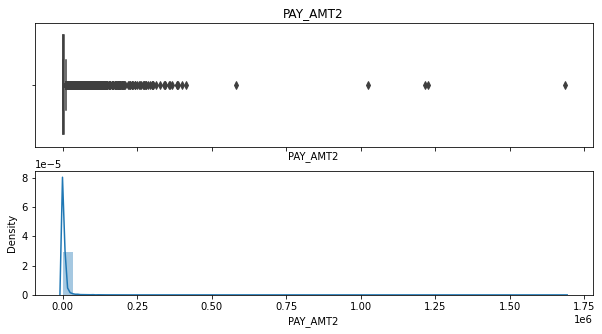

Min: 			 0
Lower Quartile: 	 833
median: 		 2,009
mean: 			 5,921
Upper Quartile: 	 5,000
max: 			 1,684,259


Skew: 			 30.45
Kurtosis: 		 1,641.63


In [ ]:
# 10. 'PAY_AMT2'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

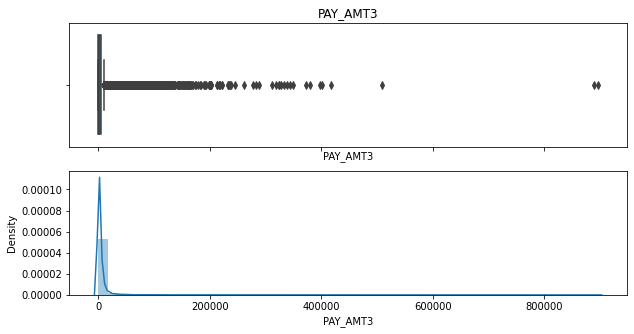

Min: 			 0
Lower Quartile: 	 390
median: 		 1,800
mean: 			 5,226
Upper Quartile: 	 4,505
max: 			 896,040


Skew: 			 17.22
Kurtosis: 		 564.31


In [ ]:
# 11. 'PAY_AMT3'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

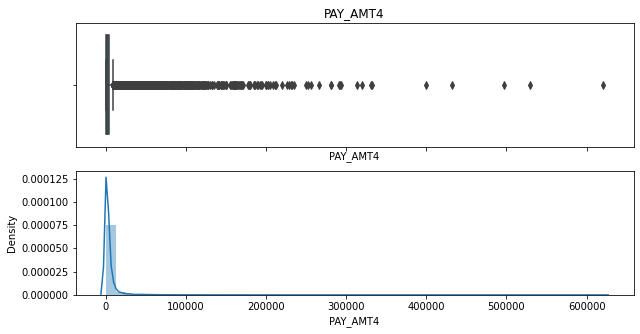

Min: 			 0
Lower Quartile: 	 296
median: 		 1,500
mean: 			 4,826
Upper Quartile: 	 4,013
max: 			 621,000


Skew: 			 12.90
Kurtosis: 		 277.33


In [ ]:
# 12. 'PAY_AMT4'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

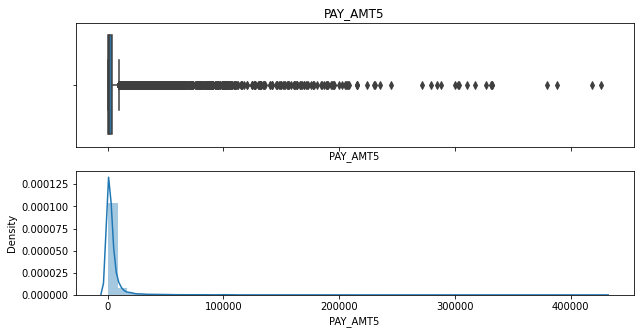

Min: 			 0
Lower Quartile: 	 252
median: 		 1,500
mean: 			 4,799
Upper Quartile: 	 4,032
max: 			 426,529


Skew: 			 11.13
Kurtosis: 		 180.06


In [ ]:
# 13. 'PAY_AMT5'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

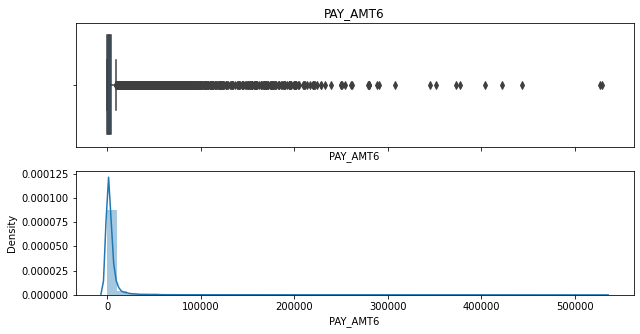

Min: 			 0
Lower Quartile: 	 118
median: 		 1,500
mean: 			 5,216
Upper Quartile: 	 4,000
max: 			 528,666


Skew: 			 10.64
Kurtosis: 		 167.16


In [ ]:
# 14. 'PAY_AMT6'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

#### Manipulations done and insights found

* After copying the original dataset, we performed some basic data manipulations and renamed complex column names.
* We made a change to the data type of the variables and changed a few of them into categorical columns, which the model needs to understand.
* After conducting a check, we discovered that the dependent variable may require rebalancing.
* The values in the "EDUCATION" column have been reassigned as a result of a check of all categorical variables.
* When we checked all of the numerical variables, we found that almost every numerical column has a lot of outliers, which we will get rid of all in the feature engineering step.

## **5. Hypothesis Testing**

#### Based on chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through codes and statistical testings.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

1. Men not defaulting are more than or equal to 40 years of AGE.
2. Customers defaulting have limit balance less than 100000.
3. Customers defaulting have total last bill amount of 50000.

In all of the hypothesis tests in this notebook, we will use a significance level of α = 0.05

#### Hypothetical Statement - 1
Men not defaulting are more than or equal to 40 years of AGE.

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 40

Alternate Hypothesis : N < 40

Test Type: Left Tailed Test


#####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# SEX: 
# 1 = male; 2 = female

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default

hypo_1 = df[(df['SEX']==1) & (df["DP_NEXT_MONTH"]==0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = hypo_1["AGE"].mean()
size = len(hypo_1)
std=(variance(hypo_1["AGE"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.2867824212425077e-290


##### Which statistical test have you done to obtain P-Value?

I used Z-Test as the statistical testing to get the P-Value, and the results showed that the null hypothesis could not be rejected, and male customers who didn't default were over 40 years old.

##### Why did you choose the specific statistical test?

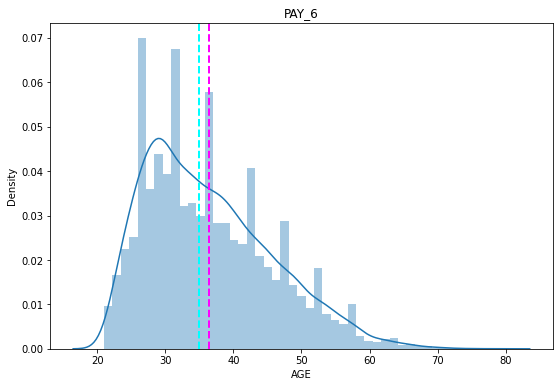

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["AGE"])
sns.distplot(hypo_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_1["AGE"].mean()- hypo_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.4286189683860258


The figure demonstrates that the mean and median are roughly equivalent; the difference between them is 1.42 (less than 10). As a result, the distribution is normal. I have used Z-Test directly as a result.

We have failed to reject the null hypothesis that N < 40

#### Hypothetical Statement - 2
Customers defaulting have limit balance less than 100000

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 100000

Alternate Hypothesis : N > 100000

Test Type: Right Tailed Test


##### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_2=df[(df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = hypo_2["LIMIT_BAL"].mean()
size = len(hypo_2)
std=(variance(hypo_2["LIMIT_BAL"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 4.4753017364632867e-97


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis was wrong and that customers who defaulted had a limit balance of less than 100,000.

##### Why did you choose the specific statistical test?

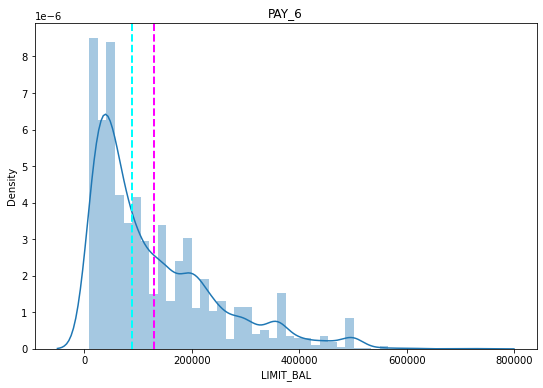

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["LIMIT_BAL"])
sns.distplot(hypo_2["LIMIT_BAL"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_2["LIMIT_BAL"].mean()- hypo_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 40109.65641952984


The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed. Z-Test cannot be used with skewed data.

For small studies, non-parametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

#### Hypothetical Statement - 3
Customers defaulting have total last bill amount of 50000.

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 50000

Alternate Hypothesis : N != 50000

Test Type: Two Tailed test


##### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_3=df[(df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 50000
sample_mean = hypo_3["BILL_AMT1"].mean()
size = len(hypo_3)
std=(variance(hypo_3["BILL_AMT1"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="BILL_AMT1")

# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.09980885383426225.


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis could not be rejected, so the statement that "Customers defaulted with a total last bill amount of 50,000" was correct.

##### Why did you choose the specific statistical test?

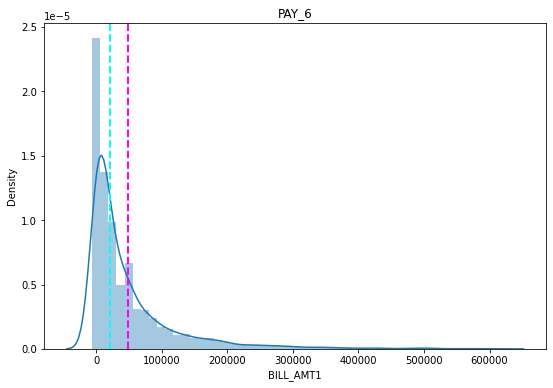

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["BILL_AMT1"])
sns.distplot(hypo_3["BILL_AMT1"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_3["BILL_AMT1"].median()- hypo_3["BILL_AMT1"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -28324.162296564195


The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed Z-Test cannot be used with skewed data.

For small studies, nonparametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

## **6. Feature Engineering & Data Pre-processing**

#### <b>Copying the data and Dropping unnecessary columns

In [ ]:
# copying this data to protect the work done till now 
df_feature = df.copy()

In [ ]:
# checking the columns to drop
df_feature.head()

ID  LIMIT_BAL SEX  EDUCATION MARRIAGE  AGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5  \
0   1      20000   2          2        1   24     2     2    -1    -1    -2   
1   2     120000   2          2        2   26    -1     2     0     0     0   
2   3      90000   2          2        2   34     0     0     0     0     0   
3   4      50000   2          2        1   37     0     0     0     0     0   
4   5      50000   1          2        1   57    -1     0    -1     0     0   

  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0    -2       3913       3102        689          0          0          0   
1     2       2682       1725       2682       3272       3455       3261   
2     0      29239      14027      13559      14331      14948      15549   
3     0      46990      48233      49291      28314      28959      29547   
4     0       8617       5670      35835      20940      19146      19131   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DP_NEXT_MONTH  
0         0       689         0         0         0         0              1  
1         0      1000      1000      1000         0      2000              1  
2      1518      1500      1000      1000      1000      5000              0  
3      2000      2019      1200      1100      1069      1000              0  
4      2000     36681     10000      9000       689       679              0

In [ ]:
# dropping the ID column
df_feature.drop('ID',axis = 1, inplace = True)

In [ ]:
# checking the columns again
df_feature.columns                # good to go for next data pre_processing

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

#### <b> Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_feature.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
x = df_feature.isnull()

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_1            0
PAY_2            0
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1        0
BILL_AMT2        0
BILL_AMT3        0
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2         0
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
DP_NEXT_MONTH    0
dtype: int64


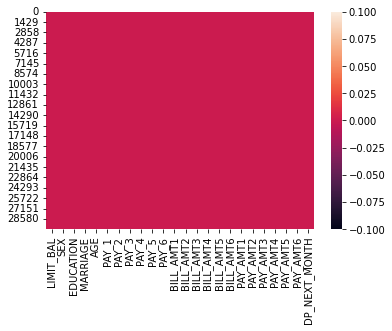

In [ ]:
sns.heatmap(df_feature.isnull(), cbar=True)

##### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

#### <b> Replace capital letters with lower-case letters and replace spaces with underscores

In [ ]:
# Get the current list of columns names
col_names_current = list(df_feature.columns)
col_names_current

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DP_NEXT_MONTH']

In [ ]:
# lower the column names usinf nested loop
col_names_new = [s.lower().replace(" ", "_") for s in col_names_current]
col_names_new

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'dp_next_month']

In [ ]:
# mapping it with dictionary
cols_dict = {old:new for (old, new) in zip(col_names_current, col_names_new)}
cols_dict

{'LIMIT_BAL': 'limit_bal',
 'SEX': 'sex',
 'EDUCATION': 'education',
 'MARRIAGE': 'marriage',
 'AGE': 'age',
 'PAY_1': 'pay_1',
 'PAY_2': 'pay_2',
 'PAY_3': 'pay_3',
 'PAY_4': 'pay_4',
 'PAY_5': 'pay_5',
 'PAY_6': 'pay_6',
 'BILL_AMT1': 'bill_amt1',
 'BILL_AMT2': 'bill_amt2',
 'BILL_AMT3': 'bill_amt3',
 'BILL_AMT4': 'bill_amt4',
 'BILL_AMT5': 'bill_amt5',
 'BILL_AMT6': 'bill_amt6',
 'PAY_AMT1': 'pay_amt1',
 'PAY_AMT2': 'pay_amt2',
 'PAY_AMT3': 'pay_amt3',
 'PAY_AMT4': 'pay_amt4',
 'PAY_AMT5': 'pay_amt5',
 'PAY_AMT6': 'pay_amt6',
 'DP_NEXT_MONTH': 'dp_next_month'}

In [ ]:
# changing the column names
df_feature.rename(columns=cols_dict, inplace=True)

In [ ]:
# Get the current list of columns names
df_feature.columns


Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'dp_next_month'],
      dtype='object')

#### <b>Changing the category column as dtype category</b>

In [ ]:
# Checking the column names to be changed into category column
# Doing this operation again as we wanted to make sure of dtype before outlier treatment.

df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   limit_bal      30000 non-null  int64   
 1   sex            30000 non-null  category
 2   education      30000 non-null  int64   
 3   marriage       30000 non-null  category
 4   age            30000 non-null  int64   
 5   pay_1          30000 non-null  category
 6   pay_2          30000 non-null  category
 7   pay_3          30000 non-null  category
 8   pay_4          30000 non-null  category
 9   pay_5          30000 non-null  category
 10  pay_6          30000 non-null  category
 11  bill_amt1      30000 non-null  int64   
 12  bill_amt2      30000 non-null  int64   
 13  bill_amt3      30000 non-null  int64   
 14  bill_amt4      30000 non-null  int64   
 15  bill_amt5      30000 non-null  int64   
 16  bill_amt6      30000 non-null  int64   
 17  pay_amt1       30000 non-null  

In [ ]:
# Make a list of categorical columns
cols=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Cast values in the categorical columns as type str.
df_feature[cols] = df_feature[cols].astype('category')

In [ ]:
# chacking the result
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   limit_bal      30000 non-null  int64   
 1   sex            30000 non-null  category
 2   education      30000 non-null  category
 3   marriage       30000 non-null  category
 4   age            30000 non-null  int64   
 5   pay_1          30000 non-null  category
 6   pay_2          30000 non-null  category
 7   pay_3          30000 non-null  category
 8   pay_4          30000 non-null  category
 9   pay_5          30000 non-null  category
 10  pay_6          30000 non-null  category
 11  bill_amt1      30000 non-null  int64   
 12  bill_amt2      30000 non-null  int64   
 13  bill_amt3      30000 non-null  int64   
 14  bill_amt4      30000 non-null  int64   
 15  bill_amt5      30000 non-null  int64   
 16  bill_amt6      30000 non-null  int64   
 17  pay_amt1       30000 non-null  

#### <b> Handling Outliers </b>

In [ ]:
# Handling Outliers & Outlier treatments
# Using for loop to create 2 lists of columns for symmetric and non_symmetric columns

symmetric_feature=[]
non_symmetric_feature=[]
for i in df_feature.describe().columns:
  if abs(df_feature[i].mean() - df_feature[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'dp_next_month']


* The distribution of the majority of the columns is skew-symmetric.
* Z Score > 3 pruning is used for symmetric columns; in our case, there are no columns in our symmetric_feature. 
* Inter Quartile Range is used for non-symmetric columns.
* Because it is a binary feature, we will also remove our dependent variable, "dp_next_month," from non_symmetric_feature.

##### Handling outliers in symmetric features
(Not needed in our case)

In [ ]:
# For Symmetric features defining upper and lower boundry
# def outlier_treatment(df_feature,i):
#   upper_boundary= df_feature[i].mean() + 3*df_feature[i].std()
#   lower_boundary= df_feature[i].mean() - 3*df_feature[i].std()
#   return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
# for i in symmetric_feature:
#  df_feature.loc[df_feature[i]<=outlier_treatment(df_feature=df_feature,i=i)[1], i]=outlier_treatment(df_feature=df_feature,i=i)[1]
#  df_feature.loc[df_feature[i]>=outlier_treatment(df_feature=df_feature,i=i)[0], i]=outlier_treatment(df_feature=df_feature,i=i)[0]

##### Handling outliers in non_symmetric_features

In [ ]:
# dropping 'dp_next_month' from non_symmetric_feature
non_symmetric_feature.pop(-1)

'dp_next_month'

In [ ]:
non_symmetric_feature

['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6']

In [ ]:
def plotting(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot'''

  # Display boxplot and dist plot.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()
  return None

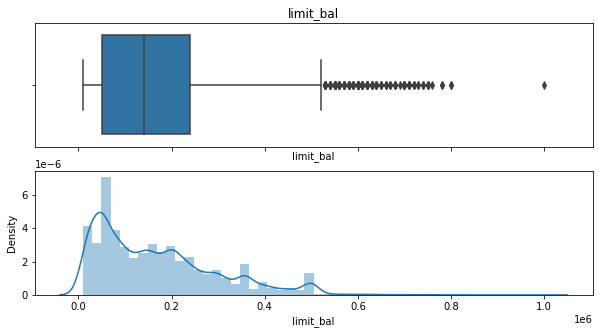

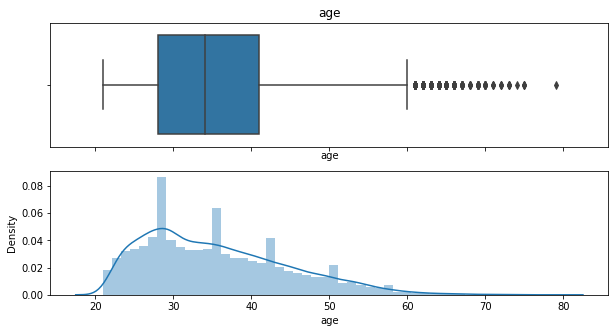

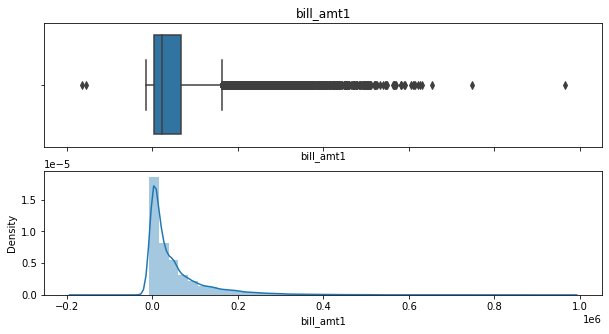

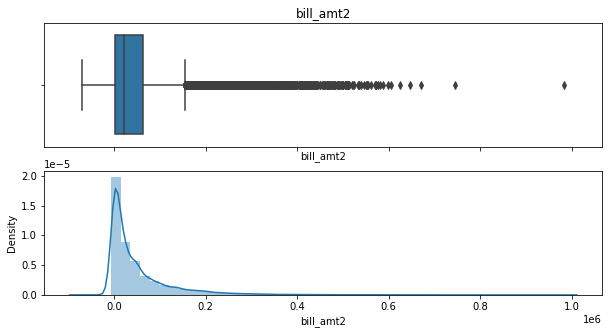

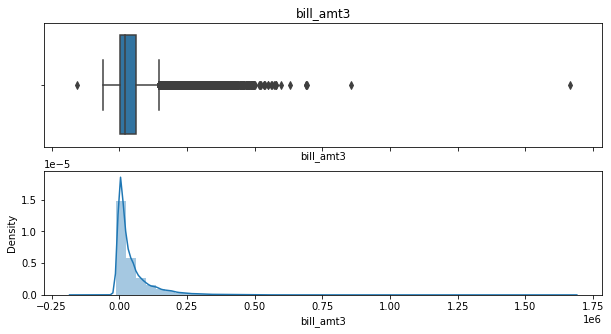

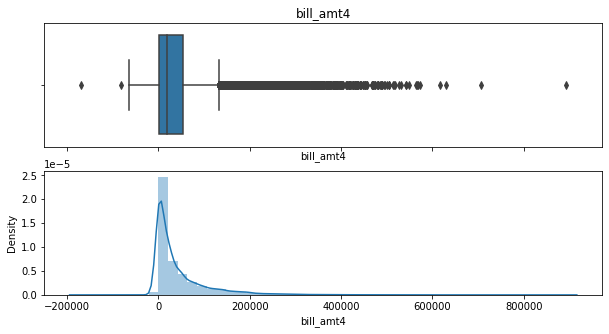

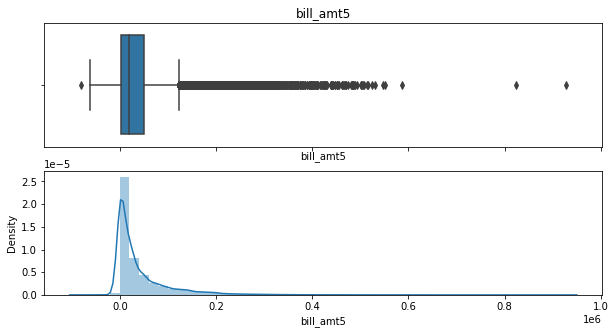

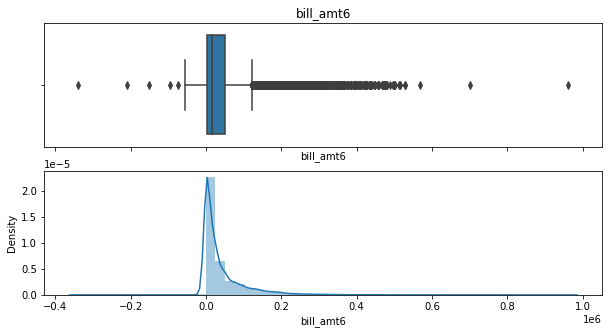

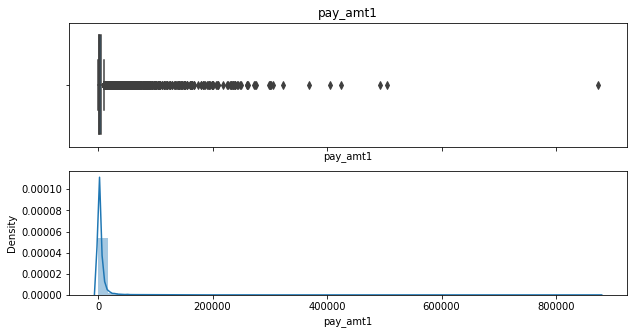

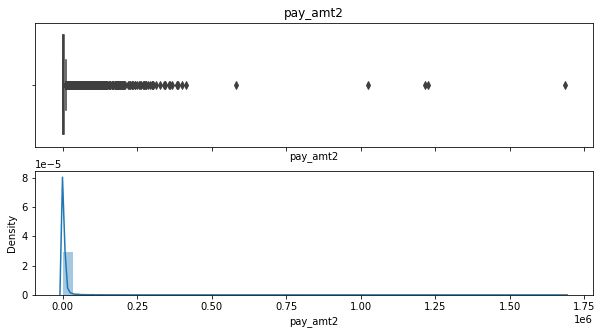

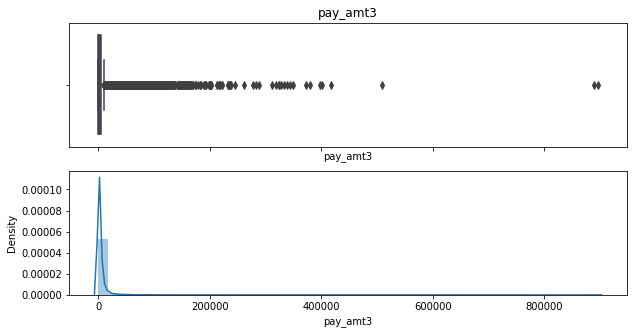

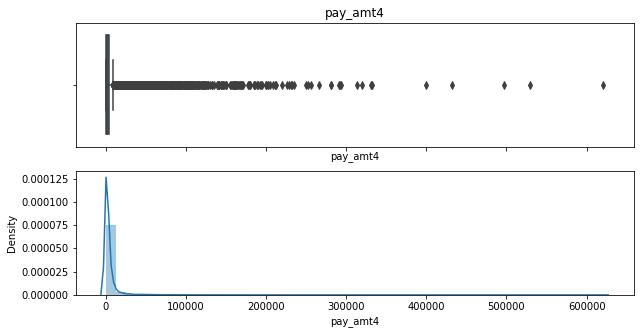

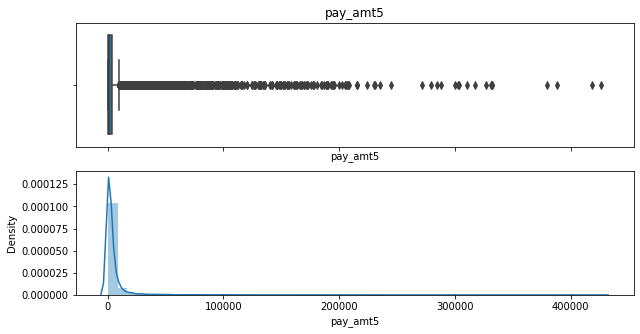

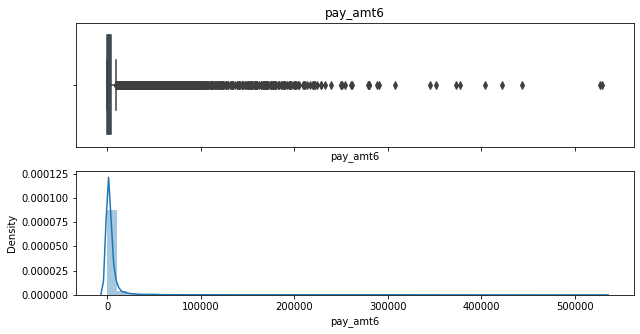

In [ ]:
# checking the plot of non_symmetric columns
for i in non_symmetric_feature:
  plotting(df_feature[i])

The plots reveal that the distributions of all of the columns in non_symmetric_features are skew-symmetric.

The data with a Z score greater than 3 will be pruned.

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
# we are going to prune the data having Z score > 3

def outlier_treatment_skew(df_feature,i):
  IQR= df_feature[i].quantile(0.75)- df_feature[i].quantile(0.25)
  lower_bridge =df_feature[i].quantile(0.25)-3*IQR
  upper_bridge =df_feature[i].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Dropping rows with Zscore > 3
df_feature = df_feature[(np.abs(stats.zscore(df_feature.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [ ]:
df_feature.shape

(27076, 24)

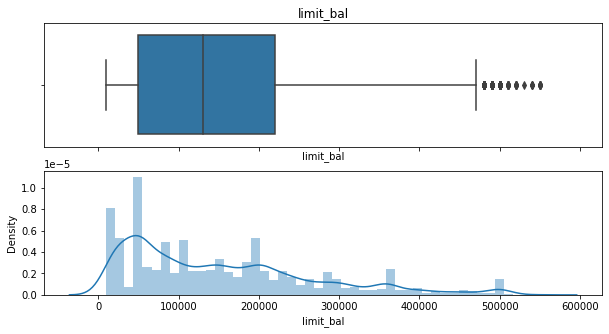

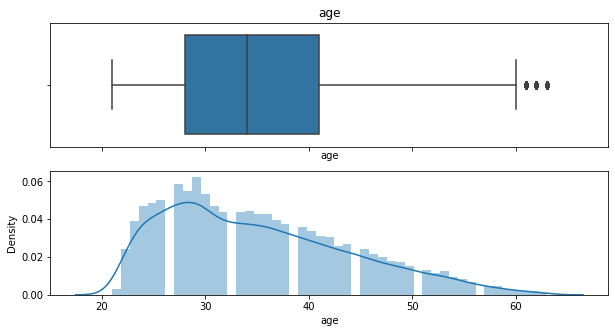

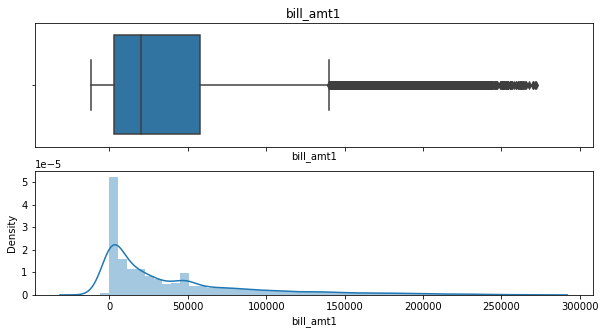

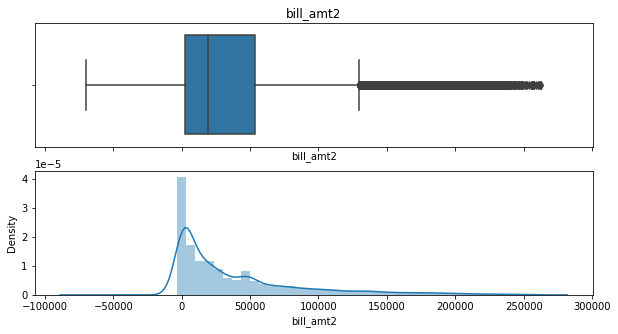

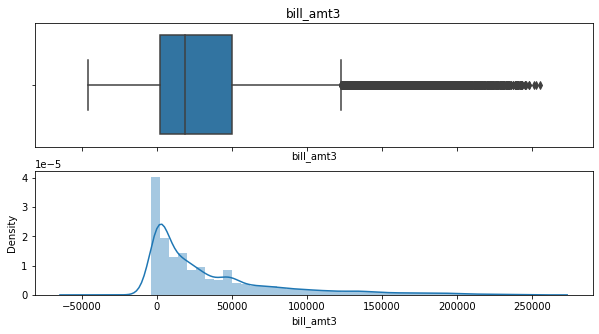

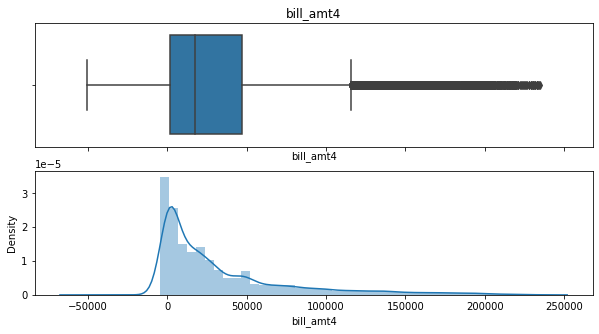

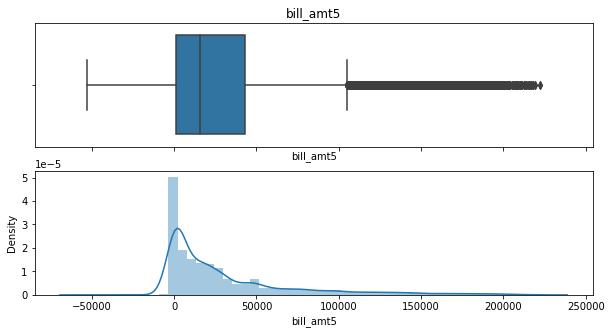

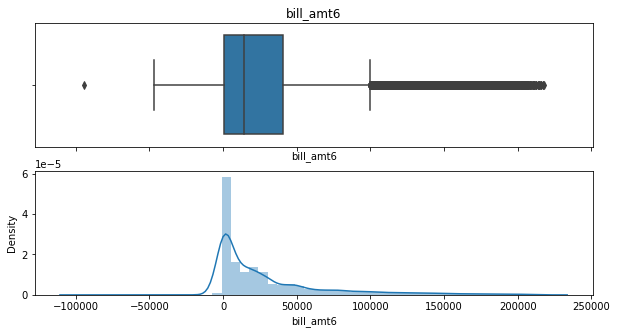

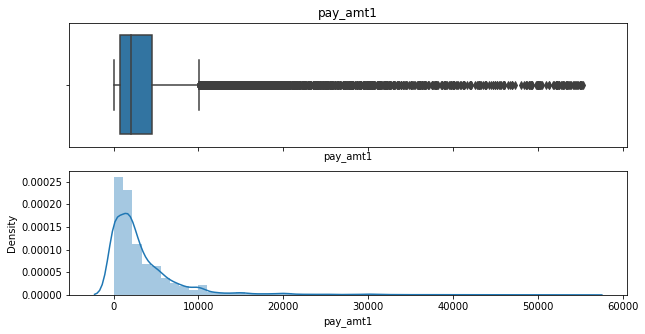

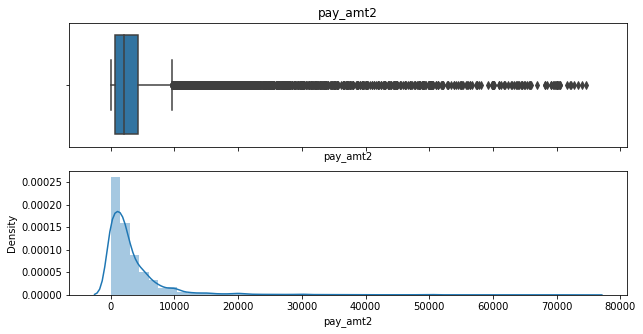

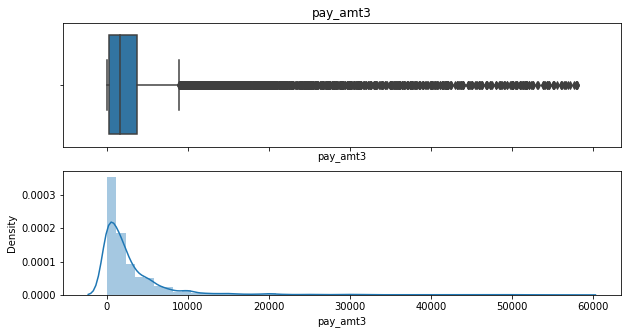

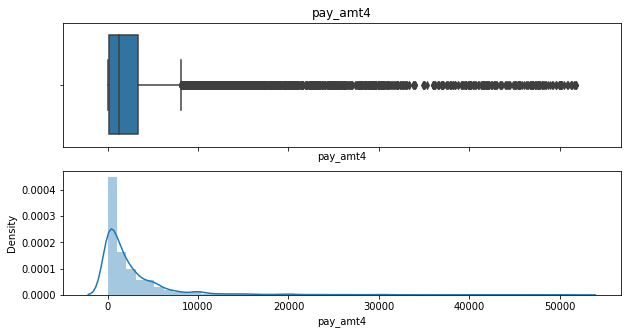

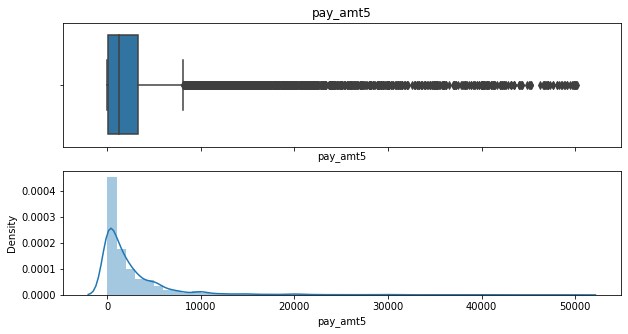

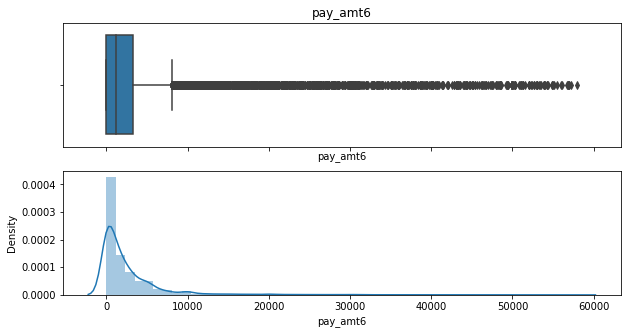

In [ ]:
# checking the distribution of treated non_symmetric_feature
for i in non_symmetric_feature:
  plotting(df_feature[i])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I differentiated between skew symmetric and symmetric features and set the upper and lower boundries as shown in the following. Again, because this is a classification problem, I limit both bounds and reduce the higher value that is not limited to the upper limit.

Z Score > 3 pruning is used for symmetric columns in the outlier treatment because the majority of the columns have a skew-symmetric distribution; Our symmetric_feature lacks columns in this instance. For non-symmetric columns, Inter Quartile Range is used.

Another way to do it is dropping extreme values but I didn't do that due to less no. of datapoints I have.

While it is the symmetric curve and outlier in a Gaussian distribution, After that, we can use standard deviation to establish the boundary.

The box plot is a useful graphical representation for describing the data's behavior at the middle and ends of distributions. The median, as well as the lower and upper quartiles (the 25th and 75th percentiles, respectively) are utilized in the box plot. The difference between Q3 and Q1 is referred to as the interquartile range, or IQ, when the lower quartile is Q1 and the upper quartile is Q3. To create a box plot, a solid line is drawn across the box between the upper and lower quartiles to locate the median. 

#### <b> SMOTE for Handling Imbalanced Data (Dependent Variable) </b>

0    20879
1     6197
Name: dp_next_month, dtype: int64
 


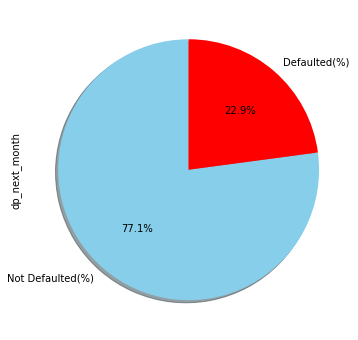

In [ ]:
# Dependant Column Value Counts
print(df_feature.dp_next_month.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_feature['dp_next_month'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulted(%)','Defaulted(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

In the context of supervised machine learning involving two or more classes, an imbalanced dataset is most relevant.

Imbalance indicates a disparity in the number of data points available for various classes:
Balanced data would result in 50 percentage points for each class if there are two classes. Little imbalance is not a problem for the majority of machine learning techniques. Therefore, if one class receives 60% points and the other receives 40%, there shouldn't be a significant drop in performance. Standard optimization criteria or performance measures may not be as effective and would need to be modified only when the class imbalance is high, such as 90% points for one class and 10% for the other.

The dependent column data ratio for our dataset is 78:22. Therefore, bias will occur during model development, and there is a good chance that the majority of predictions will be accurate. Therefore, the dataset ought to be balanced before the model creation phase.

In [ ]:
# Handling Imbalanced Dataset 
# Handaling imbalance dataset using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(df_feature.iloc[:,0:-1], df_feature['dp_next_month'])

print('Original dataset shape', len(df_feature))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 27076
Resampled dataset shape 41758


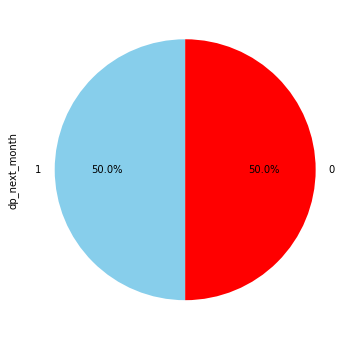

In [ ]:
# Dependant trainng Column Value Counts
y_smote.value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,colors=['skyblue','red'], )

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The 78:22 dataset was balanced with the help of the synthetic minority over-sampling technique (SMOTE).

SMOTE is a machine learning method for resolving issues brought on by working with an unbalanced data set. The majority of ML algorithms are highly susceptible to unbalanced data, so we must use tools like SMOTE to improve their performance in the real world.

Before training the classifier, balancing schemes were proposed to correct this disparity by enhancing the data to make it more balanced. The easiest way to balance is to either duplicate minority samples and oversample the minority class or under-sample the majority class.

SMOTE was the first to propose the idea of incorporating synthetic minority samples into tabular data. Synthetic minority samples are created by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that uses raw data to generate artificial data points. SMOTE can be thought of as a specific data augmentation algorithm or a more advanced version of oversampling.

The advantage of SMOTE is that synthetic data points that are slightly different from the original data points are generated instead of duplicate data points. SMOTE is a better option for oversampling.

I used the SMOTE technique to balance the dataset, which has many advantages.

In [ ]:
X_smote.shape, y_smote.shape

((41758, 23), (41758,))

We need to append all these values to our original dataframe

In [ ]:
columns = list(df_feature.columns)
columns

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'dp_next_month']

In [ ]:
columns.pop()

'dp_next_month'

In [ ]:
df_feature = pd.DataFrame(X_smote, columns=columns)

In [ ]:
df_feature['dp_next_month'] = y_smote

In [ ]:
df_feature.shape

(41758, 24)

#### <b>One-hot-encoding for categorical variables</b>

We will one-hot-encode all of the categorical variables, excluding the target variable dp_next_month.

In [ ]:
# Make a list of categorical columns
cols=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [ ]:
# check the datatypes of each column in the DataFrame
df_feature.dtypes

limit_bal           int64
sex              category
education        category
marriage         category
age                 int64
pay_1            category
pay_2            category
pay_3            category
pay_4            category
pay_5            category
pay_6            category
bill_amt1           int64
bill_amt2           int64
bill_amt3           int64
bill_amt4           int64
bill_amt5           int64
bill_amt6           int64
pay_amt1            int64
pay_amt2            int64
pay_amt3            int64
pay_amt4            int64
pay_amt5            int64
pay_amt6            int64
dp_next_month       int64
dtype: object

In [ ]:
# Cast values in the categorical columns as type str.
df_feature[cols] = df_feature[cols].astype(str)

In [ ]:
# check it again to make sure
df_feature.dtypes

limit_bal         int64
sex              object
education        object
marriage         object
age               int64
pay_1            object
pay_2            object
pay_3            object
pay_4            object
pay_5            object
pay_6            object
bill_amt1         int64
bill_amt2         int64
bill_amt3         int64
bill_amt4         int64
bill_amt5         int64
bill_amt6         int64
pay_amt1          int64
pay_amt2          int64
pay_amt3          int64
pay_amt4          int64
pay_amt5          int64
pay_amt6          int64
dp_next_month     int64
dtype: object

In [ ]:
# One-hot-encode the categorical variables
df_feature = pd.get_dummies(df_feature, columns=cols, drop_first=True)
df_feature.head(3)

limit_bal  age  bill_amt1  bill_amt2  bill_amt3  bill_amt4  bill_amt5  \
0      20000   24       3913       3102        689          0          0   
1     120000   26       2682       1725       2682       3272       3455   
2      90000   34      29239      14027      13559      14331      14948   

   bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   

   dp_next_month  sex_2  education_2  education_3  education_4  marriage_1  \
0              1      1            1            0            0           1   
1              1      1            1            0            0           0   
2              0      1            1            0            0           0   

   marriage_2  marriage_3  pay_1_-2  pay_1_0  pay_1_1  pay_1_2  pay_1_3  \
0           0           0         0        0        0        1        0   
1           1           0         0        0        0        0        0   
2           1           0         0        1        0        0        0   

   pay_1_4  pay_1_5  pay_1_6  pay_1_7  pay_1_8  pay_2_-2  pay_2_0  pay_2_1  \
0        0        0        0        0        0         0        0        0   
1        0        0        0        0        0         0        0        0   
2        0        0        0        0        0         0        1        0   

   pay_2_2  pay_2_3  pay_2_4  pay_2_5  pay_2_6  pay_2_7  pay_2_8  pay_3_-2  \
0        1        0        0        0        0        0        0         0   
1        1        0        0        0        0        0        0         0   
2        0        0        0        0        0        0        0         0   

   pay_3_0  pay_3_1  pay_3_2  pay_3_3  pay_3_4  pay_3_5  pay_3_6  pay_3_7  \
0        0        0        0        0        0        0        0        0   
1        1        0        0        0        0        0        0        0   
2        1        0        0        0        0        0        0        0   

   pay_3_8  pay_4_-2  pay_4_0  pay_4_1  pay_4_2  pay_4_3  pay_4_4  pay_4_5  \
0        0         0        0        0        0        0        0        0   
1        0         0        1        0        0        0        0        0   
2        0         0        1        0        0        0        0        0   

   pay_4_6  pay_4_7  pay_4_8  pay_5_-2  pay_5_0  pay_5_2  pay_5_3  pay_5_4  \
0        0        0        0         1        0        0        0        0   
1        0        0        0         0        1        0        0        0   
2        0        0        0         0        1        0        0        0   

   pay_5_5  pay_5_6  pay_5_7  pay_5_8  pay_5_nan  pay_6_-2  pay_6_0  pay_6_2  \
0        0        0        0        0          0         1        0        0   
1        0        0        0        0          0         0        0        1   
2        0        0        0        0          0         0        1        0   

   pay_6_3  pay_6_4  pay_6_5  pay_6_6  pay_6_7  pay_6_8  pay_6_nan  
0        0        0        0        0        0        0          0  
1        0        0        0        0        0        0          0  
2        0        0        0        0        0        0          0

In [ ]:
# checking the shape of the our data after one hot encoding
df_feature.shape

(41758, 82)

##### What all categorical encoding techniques have you used & why did you use those techniques?

The majority of machine learning algorithms require numerical data conversion because categorical data cannot be used. Columns that contain categorical features (string values) occasionally appear in datasets. For instance, the parameter Gender contains categorical parameters such as Male and Female. Because the data is labeled using strings, machine learning models incorrectly assumed that there is a hierarchy among these labels.

* One Hot Coding:
The categorical parameters will create separate columns for Male and Female labels using this method. Therefore, the value in the Male column will always be one and the Female column will always be zero, and vice versa. I did the same thing for all the categorical columns

#### <b> Heatmap Plot and Variable Inflation Factor </b>
Obtaining correlation between the dependent variable and other numerical features by making use of heatmap plots of all the numerical features

In [ ]:
# Correlation Heatmap visualization code
corr = df_feature.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
df_feature.shape

(41758, 82)

In [ ]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_feature.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


age
bill_amt1
bill_amt2
bill_amt3
bill_amt4
bill_amt5
bill_amt6
marriage_1
marriage_2
pay_1_0
pay_1_8
pay_2_0
pay_2_7
pay_3_0
pay_4_0
pay_4_7
pay_5_0
pay_5_6
pay_5_7
pay_6_0
pay_6_7


As of now even after calculating the VIF we are not dropping any columns which are highly correlated, We wanted to do mistake and learn from it.

##### What all feature selection methods have you used  and why?

A Pearson correlation is a number between -1 and 1 that shows how much a linear relationship exists between two variables. The correlation coefficient has values between -1 and 1. 
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation) 
* A value closer to 1 implies stronger positive correlation 
* A value closer to -1 implies stronger negative correlation 

Collinearity is the state in which two variables are highly correlated and contain similar information about the variance within a given dataset. It is also known as the "product moment correlation coefficient" (PMCC) or simply "correlation." Make a correlation matrix and look for variables with high absolute values to find collinearity among them.

#### <b> Dimentionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

To the best of my knowledge, dimensionality reduction is not required for this dataset.

primarily at a particular point in the algorithm that is dedicated to dimension reduction or where high dimensions pose a problem.

Instead, we can gain some insight by considering the reasons we might want to carry this out. Although some of the following might appear a little muddled at the edges, the goal is to convey a flavor.

1. We have too much data. 4,000,000 rows Are there a lot of redundancy in 50,000 columns? A model based on this might cost a lot to build. If there are strong relationships in the data that can be linearly approximated, even relatively straightforward dimension reduction techniques like PCA can capture almost all of the information in a small amount of memory.

2. We are overstretched. If you don't have many examples, you can easily overfit a model with tens of thousands of degrees of freedom. While dimension reduction is one approach, it is rarely the best 3. We intend to incorporate external data. Okay, this is different, but it's important to note. Using an embedding, we want to create a classifier for applications like word2vec. With only a few examples, we might want to classify some text into different categories. The free text has a lot of complexity, but a low-dimension embedding is much smaller and won't overfit a classifier as much. Using dimension reduction to incorporate external data, a low-dimensional embedding on external text is applied to the text to be classified before building a classifier.

4. The curse of dimension afflicts us. Think about something like a search for your nearest neighbor. Euclidean distances are a good example of the kind of unintended behavior that occurs when the number of dimensions increases. For nearest neighbor, clustering, or outlier detection, projecting your data to a lower dimensional space can be more robust and meaningful.

5. This is the sole focus of some tools. An illustration of this is matrix factorization-based collaborative filtering. Is it possible to roughly describe behavior as a linear combination of fewer preferences or behaviors?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not needed for our dataset.

#### <b> Data Splitting </b>


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 70:30 ratio

X_train,X_test,y_train,y_test=train_test_split(df_feature.drop("dp_next_month",axis=1),df_feature["dp_next_month"],test_size=0.3,random_state=0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (29230, 81)
Number transactions y_train dataset:  (29230,)
Number transactions X_test dataset:  (12528, 81)
Number transactions y_test dataset:  (12528,)


##### What data splitting ratio have you used and why? 

There are two issues at stake: Your parameter estimates exhibit greater variance with less training data. Your performance statistic will have greater variance with less testing data. In general, you should focus on dividing the data so that neither the absolute number of instances in each category nor the percentage is too high, which is more important.

Because no single split will provide you with sufficient variance in your estimates, cross-validation is probably your only option if you have a total of 100 instances. If you have 100,000 instances, it doesn't matter if you split them 80:20 or 90:10 (although you might want to use less training data if your method requires a lot of computational power).

You might be surprised to learn that the 80/20 ratio—also known as the Pareto principle—occurs quite frequently. If you use that ratio, it is usually a safe bet.

The small training dataset in this instance necessitates a 70:30 ratio.

#### **Evaluation Metrics Used -**

* <b>Accuracy:</b> Simply put, accuracy is the percentage of times that the classifier correctly predicts. The ratio of the total number of predictions to the number of correct predictions is how accuracy is defined. If a model has a 99 percent accuracy rate, you might think it is doing very well. However, this is not always the case and can be misleading in some situations.
When the target class is well-balanced, accuracy is useful, but it is not a good choice for unbalanced classes.

* <b>Confusion Matrix:</b> The Confusion Matrix is a performance measurement for classification problems in machine learning in which there can be two or more classes output. It is a table with actual and predicted value combinations. The table that is frequently used to describe the performance of a classification model on a set of test data for which the true values are known is referred to as a confusion matrix. It is extremely helpful for determining the AUC-ROC curves, precision, recall, and accuracy.

* <b>Precision:</b> Precision explains the percentage of correctly predicted cases that were actually successful. When False Positives are more of a concern than False Negatives, precision can be useful.
A label's precision is calculated by dividing the number of predicted positives by the number of true positives.

* <b>Recall:</b> Recall describes the proportion of actual positive cases that our model correctly predicted. When False Negative is more important than False Positive, this metric is helpful. In medical cases, it matters whether we raise a false alarm or not, but the actual positive cases should not go unnoticed. The number of true positives divided by the total number of actual positives is the definition of recall for a label.

* <b>F1 Score:</b> This score incorporates both Precision and Recall metrics. When Precision and Recall are equal, it reaches its peak.
The harmonic mean of recall and precision is the F1 Score.

* <b>AUC-ROC:</b> The Receiver Operator Characteristic (ROC) is a probability curve that separates the "signal" from the "noise" by plotting the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The measure of a classifier's ability to differentiate between classes is the Area Under the Curve (AUC). This simply indicates that the classifier is able to precisely differentiate between all Positive and Negative class points when AUC is equal to 1. The classifier would correctly identify all negatives as positives when the AUC was zero.

## **7. ML Model Implementation**

#### **1st Model - Logistic Regression**

Logistic regression is one of the simplest algorithms for estimating the relationship between independent variables and a single dependent binary variable and determining the likelihood of an event occurring.

The regulation parameter C controls the trade-off between keeping the model simple (underfitting) and increasing its complexity (overfitting). With increasing values of C, the model becomes more complicated and the power of regulation decreases, resulting in an overfitting of the data.

In [ ]:
# ML Model Implementation
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
lr.coef_

array([[-2.29426817e-06,  1.91365848e-02, -1.58300397e-05,
         9.36869111e-06,  3.74196111e-06,  3.15447012e-06,
        -3.63512062e-06,  1.08448337e-05, -5.30631152e-05,
        -4.54727386e-05, -3.42977694e-05, -2.23847356e-05,
        -3.60035248e-05, -1.72884436e-05, -2.23872325e-04,
         3.50105303e-04, -1.20356315e-04, -3.23033231e-05,
         7.59064718e-04, -2.10634978e-04, -1.25457875e-05,
        -1.08667539e-04, -1.78310509e-04,  3.52405543e-04,
         3.98089908e-04,  4.21734695e-05,  5.20116374e-06,
         1.36455027e-06,  1.30665270e-06,  6.69013868e-07,
        -3.82623277e-07, -4.72453200e-05, -1.58876028e-04,
         2.63655860e-04,  4.02079602e-04,  2.20502315e-05,
         2.69612395e-06,  1.81957833e-06,  8.16061613e-07,
        -2.32459722e-07, -1.86396686e-07, -4.33879146e-05,
        -7.57680401e-05,  2.52301737e-04,  3.17340855e-04,
         1.59544363e-05,  5.61419052e-06,  1.35338526e-06,
         7.80988771e-07,  4.04658773e-06,  1.81698523e-0

In [ ]:
# Checking the intercept value
lr.intercept_

array([0.00053401])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = lr.predict_proba(X_train)
test_preds = lr.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6345877523092713
The accuracy on test data is  0.6314655172413793


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[ 7730  6904]
 [ 3777 10819]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

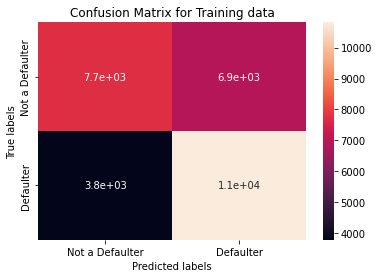

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
lr_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",lr_train_accuracy)

# Calculate Recall
lr_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",lr_train_recall)

# Calculate Precision
lr_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",lr_train_precision)

# Calculate F1_Score
lr_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",lr_train_f1_score)

# Calculate ROC_AUC
lr_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",lr_train_roc_auc_score)

Accuracy : 0.6345877523092713
Recall : 0.7412304741024939
Precision : 0.6104496981323704
F1_Score : 0.6695132893963305
ROC_AUC : 0.6347262114943246


In [ ]:
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59     14634
           1       0.61      0.74      0.67     14596

    accuracy                           0.63     29230
   macro avg       0.64      0.63      0.63     29230
weighted avg       0.64      0.63      0.63     29230

 
roc_auc_score
0.6347262114943246


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Logistic Regression',
       'Accuracy':round(lr_train_accuracy,2),
       'Recall':round(lr_train_recall,2),
       'Precision':round(lr_train_precision,2),
       'F1_Score':round(lr_train_f1_score,2),
       'ROC_AUC':round(lr_train_roc_auc_score,2)
       }
training_df = pd.DataFrame(dict1,index=[1])

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
1  Logistic Regression      0.63    0.74       0.61      0.67     0.63

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[3263 2982]
 [1635 4648]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

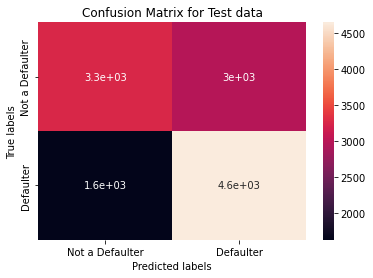

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
lr_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",lr_test_accuracy)

# Calculate Recall
lr_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",lr_test_recall)

# Calculate Precision
lr_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",lr_test_precision)

# Calculate F1_Score
lr_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",lr_test_f1_score)

# Calculate ROC_AUC
lr_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",lr_test_roc_auc_score)

Accuracy : 0.6314655172413793
Recall : 0.7397739933152953
Precision : 0.6091743119266055
F1_Score : 0.668152087975275
ROC_AUC : 0.6311359958570072


In [ ]:
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59      6245
           1       0.61      0.74      0.67      6283

    accuracy                           0.63     12528
   macro avg       0.64      0.63      0.63     12528
weighted avg       0.64      0.63      0.63     12528

 
roc_auc_score
0.6311359958570072


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Logistic regression',
       'Accuracy':round(lr_test_accuracy,2),
       'Recall':round(lr_test_recall,2),
       'Precision':round(lr_test_precision,2),
       'F1_Score':round(lr_test_f1_score,2),
       'ROC_AUC':round(lr_test_roc_auc_score,2)
       }
test_df = pd.DataFrame(dict2,index=[1])

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
1  Logistic regression      0.63    0.74       0.61      0.67     0.63

The model was created using the Logistic Regression algorithm, and the following outcomes were obtained for the training dataset: accuracy of 63%, recall of 74%, precision of 61%, f1-score of 67%, and ROC AUC score of 63%.

For the testing dataset: Accuracy is 63%, recall is 74%, precision is 61%, the f1-score is 67%, and the ROC AUC score is 63%.

Next, We are using the hyperparameter tuning method, attempting to raise the score.

Before moving on to the next models, let's try adjusting some hyperparameters to see if our model performs better.

Hyperparameter tuning is the process of choosing the best hyperparameters for a learning algorithm. A hyperparameter whose value is set prior to learning is referred to as a model argument. Hyperparameter tuning is essential for the success of machine learning algorithms.

* <b>Using GridSearch CV</b>
By looping through predefined hyperparameters, GridSearch CV makes it simpler to fit the model to the training set. As a result, we can ultimately select the best hyperparameters from the list.

##### Cross- Validation & Hyperparameter Tuning

In [ ]:
#import the packages
from sklearn.linear_model import LogisticRegression

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)

# making a grid 
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10]}
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)         (can use this too)

# fit model
grid_search = GridSearchCV(estimator=model,param_grid = param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 5, error_score=0)
grid_lr = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.741093 using {'C': 0.001, 'penalty': 'l2'}


In [ ]:
# best score
grid_lr.best_score_

0.7410930981242403

In [ ]:
# Predicted Probability
train_preds = grid_lr.predict_proba(X_train)        
test_preds = grid_lr.predict_proba(X_test)          

In [ ]:
# Predict on the model
# Get the predicted classes
train_class_preds = grid_lr.predict(X_train)
test_class_preds = grid_lr.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6345193294560383
The accuracy on test data is  0.6314655172413793


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[ 7732  6902]
 [ 3781 10815]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

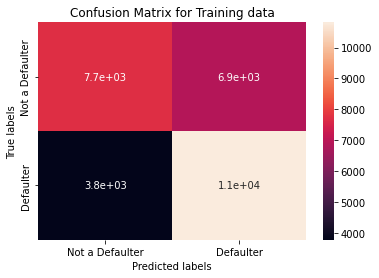

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_lr_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_lr_train_accuracy)

# Calculate Recall
grid_lr_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_lr_train_recall)

# Calculate Precision
grid_lr_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_lr_train_precision)

# Calculate F1_Score
grid_lr_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_lr_train_f1_score)

# Calculate ROC_AUC
grid_lr_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_lr_train_roc_auc_score)

Accuracy : 0.6345193294560383
Recall : 0.7409564264181968
Precision : 0.6104306598182536
F1_Score : 0.669390028780986
ROC_AUC : 0.6346575216688497


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59     14634
           1       0.61      0.74      0.67     14596

    accuracy                           0.63     29230
   macro avg       0.64      0.63      0.63     29230
weighted avg       0.64      0.63      0.63     29230

 
roc_auc_score
0.6346575216688497


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Logistic Regression (Grid)',
       'Accuracy':round(grid_lr_train_accuracy,2),
       'Recall':round(grid_lr_train_recall,2),
       'Precision':round(grid_lr_train_precision,2),
       'F1_Score':round(grid_lr_train_f1_score,2),
       'ROC_AUC':round(grid_lr_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[3263 2982]
 [1635 4648]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

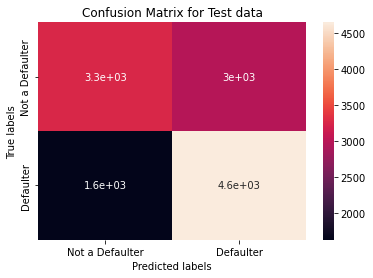

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_lr_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_lr_test_accuracy)

# Calculate Recall
grid_lr_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_lr_test_recall)

# Calculate Precision
grid_lr_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_lr_test_precision)

# Calculate F1_Score
grid_lr_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_lr_test_f1_score)

# Calculate ROC_AUC
grid_lr_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_lr_test_roc_auc_score)

Accuracy : 0.6314655172413793
Recall : 0.7397739933152953
Precision : 0.6091743119266055
F1_Score : 0.668152087975275
ROC_AUC : 0.6311359958570072


In [ ]:
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59      6245
           1       0.61      0.74      0.67      6283

    accuracy                           0.63     12528
   macro avg       0.64      0.63      0.63     12528
weighted avg       0.64      0.63      0.63     12528

 
roc_auc_score
0.6311359958570072


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Logistic regression (Grid)',
       'Accuracy':round(grid_lr_test_accuracy,2),
       'Recall':round(grid_lr_test_recall,2),
       'Precision':round(grid_lr_test_precision,2),
       'F1_Score':round(grid_lr_test_f1_score,2),
       'ROC_AUC':round(grid_lr_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2, ignore_index=True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV uses the Grid Search method to determine the most effective hyperparameters to improve model performance.

The ideal hyperparameter values for our model's prediction results ought to be our objective. However, how can these optimal hyperparameter sets be found? Using the hit-and-trial method, one can try the Manual Search method to find the best hyperparameters, which would save a lot of time when building a single model.

As a result, GridSearch and Random Search were introduced.
Grid Search uses a unique combination of each of the hyperparameters specified and their values to calculate performance and select the optimal hyperparameter value. Because of this, processing takes a long time and costs a lot of money because so many hyperparameters are involved.

In addition to Grid Search, cross-validation is carried out in GridSearchCV. During model training, cross-validation is used.

I used the GridsearchCV method for hyperparameter optimization because of this.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Both the training and test datasets do not exhibit any improvement.

We used logistic regression and obtained approximately 74% Recall-score. Recall-score is a better parameter because We are predicting the default. Let's continue using different models to see if they produce better results.

#### **2nd Model - KNN** 

In [ ]:
# import package
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# ML Model Implementation
# Create an instance of the KNN
knn_model = KNeighborsClassifier(n_neighbors = 5)

# Fit the Algorithm
knn = knn_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.821997947314403
The accuracy on test data is  0.7285280970625798


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[10572  4062]
 [ 1141 13455]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

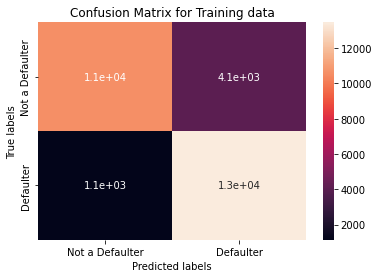

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
knn_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",knn_train_accuracy)

# Calculate Recall
knn_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",knn_train_recall)

# Calculate Precision
knn_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",knn_train_precision)

# Calculate F1_Score
knn_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",knn_train_f1_score)

# Calculate ROC_AUC
knn_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",knn_train_roc_auc_score)

Accuracy : 0.821997947314403
Recall : 0.9218278980542615
Precision : 0.7681109779071759
F1_Score : 0.8379783888144988
ROC_AUC : 0.8221275611632521


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     14634
           1       0.77      0.92      0.84     14596

    accuracy                           0.82     29230
   macro avg       0.84      0.82      0.82     29230
weighted avg       0.84      0.82      0.82     29230

 
roc_auc_score
0.8221275611632521


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'KNN',
       'Accuracy':round(knn_train_accuracy,2),
       'Recall':round(knn_train_recall,2),
       'Precision':round(knn_train_precision,2),
       'F1_Score':round(knn_train_f1_score,2),
       'ROC_AUC':round(knn_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[3793 2452]
 [ 949 5334]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

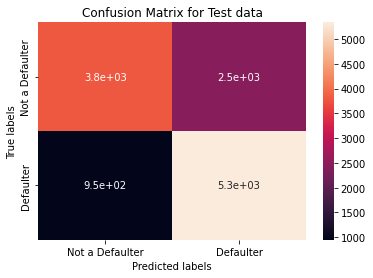

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
knn_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",knn_test_accuracy)

# Calculate Recall
knn_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",knn_test_recall)

# Calculate Precision
knn_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",knn_test_precision)

# Calculate F1_Score
knn_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",knn_test_f1_score)

# Calculate ROC_AUC
knn_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",knn_test_roc_auc_score)

Accuracy : 0.7285280970625798
Recall : 0.84895750437689
Precision : 0.6850757770357051
F1_Score : 0.7582628473949818
ROC_AUC : 0.7281616985455308


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69      6245
           1       0.69      0.85      0.76      6283

    accuracy                           0.73     12528
   macro avg       0.74      0.73      0.72     12528
weighted avg       0.74      0.73      0.72     12528

 
roc_auc_score
0.7281616985455308


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'KNN',
       'Accuracy':round(knn_test_accuracy,2),
       'Recall':round(knn_test_recall,2),
       'Precision':round(knn_test_precision,2),
       'F1_Score':round(knn_test_f1_score,2),
       'ROC_AUC':round(knn_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73

The model was created using the K Nearest Neighbour, and the following outcomes were obtained for the training dataset: accuracy of 82%, recall of 92%, precision of 77%, f1-score of 84%, and ROC AUC score of 82%.

For the testing dataset: Accuracy is 73%, recall is 85%, precision is 69%, the f1-score is 76%, and the ROC AUC score is 73%. It is a clear indication that the model is overfitting.
Let's move to our next model.

#### **3rd Model - Decision Tree** 

In [ ]:
# import the package
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# fit the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = dt.predict(X_train)
test_class_preds = dt.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9994184057475197
The accuracy on test dataset is 0.7396232439335888


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[14628     6]
 [   11 14585]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

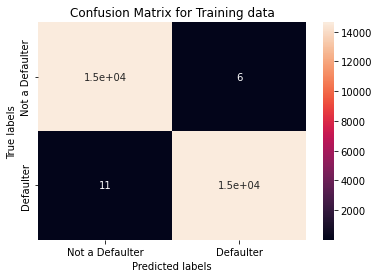

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
dt_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",dt_train_accuracy)

# Calculate Recall
dt_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",dt_train_recall)

# Calculate Precision
dt_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",dt_train_precision)

# Calculate F1_Score
dt_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",dt_train_f1_score)

# Calculate ROC_AUC
dt_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",dt_train_roc_auc_score)

Accuracy : 0.9994184057475197
Recall : 0.9992463688681831
Precision : 0.9995887876088
F1_Score : 0.9994175489087608
ROC_AUC : 0.999418182384071


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14634
           1       1.00      1.00      1.00     14596

    accuracy                           1.00     29230
   macro avg       1.00      1.00      1.00     29230
weighted avg       1.00      1.00      1.00     29230

 
roc_auc_score
0.999418182384071


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Decision Tree',
       'Accuracy':round(dt_train_accuracy,2),
       'Recall':round(dt_train_recall,2),
       'Precision':round(dt_train_precision,2),
       'F1_Score':round(dt_train_f1_score,2),
       'ROC_AUC':round(dt_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1, ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[4499 1746]
 [1516 4767]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

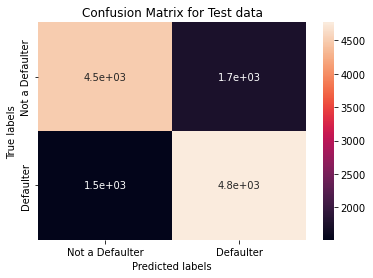

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
dt_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",dt_test_accuracy)

# Calculate Recall
dt_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",dt_test_recall)

# Calculate Precision
dt_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",dt_test_precision)

# Calculate F1_Score
dt_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",dt_test_f1_score)

# Calculate ROC_AUC
dt_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",dt_test_roc_auc_score)

Accuracy : 0.7396232439335888
Recall : 0.7587139901321025
Precision : 0.7319207738369415
F1_Score : 0.7450765864332605
ROC_AUC : 0.7395651615992778


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      6245
           1       0.73      0.76      0.75      6283

    accuracy                           0.74     12528
   macro avg       0.74      0.74      0.74     12528
weighted avg       0.74      0.74      0.74     12528

 
roc_auc_score
0.7395651615992778


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Decision Tree',
       'Accuracy':round(dt_test_accuracy,2),
       'Recall':round(dt_test_recall,2),
       'Precision':round(dt_test_precision,2),
       'F1_Score':round(dt_test_f1_score,2),
       'ROC_AUC':round(dt_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2, ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73
3               Decision Tree      0.74    0.76       0.73      0.75     0.74

The model was created using the Decision Tree algorithm, and the following outcomes were obtained for the training dataset: accuracy of 99.9%, recall of 99.9%, precision of 99.9%, f1-score of 99.9%, and ROC AUC score of 99.9%.

For the testing dataset: Accuracy is 74%, recall is 76%, precision is 73%, the f1-score is 75%, and the ROC AUC score is 74%.

Next, We are using the hyperparameter tuning method, attempting to raise the score.



Before moving on to the next models, let's try adjusting some hyperparameters to see if our model performs better.

Hyperparameter tuning is the process of choosing the best hyperparameters for a learning algorithm. A hyperparameter whose value is set prior to learning is referred to as a model argument. Hyperparameter tuning is essential for the success of machine learning algorithms.

* <b>Using GridSearch CV</b>
By looping through predefined hyperparameters, GridSearch CV makes it simpler to fit the model to the training set. As a result, we can ultimately select the best hyperparameters from the list

In [ ]:
# making grid
param_grid = {'max_depth': [10,20], 'min_samples_split':[0.4,0.6], 'min_samples_leaf': [5,10]}

In [ ]:
# importing packages
from sklearn.tree import DecisionTreeClassifier 
grid_dt_model = DecisionTreeClassifier(criterion = "gini",random_state=42)

# Grid search
grid_dt = GridSearchCV(estimator = grid_dt_model, param_grid = param_grid, cv =5,verbose=2, scoring='recall')

In [ ]:
# Fit the Algorithm
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.4; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=0.6; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=0.4; total time=   0.2s
[CV]

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [0.4, 0.6]},
             scoring='recall', verbose=2)

In [ ]:
print("Best: %f using %s" % (grid_dt.best_score_, grid_dt.best_params_))

Best: 0.741364 using {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 0.4}


In [ ]:
# best decision tree model score
grid_dt.best_score_

0.7413643957632329

In [ ]:
# Predict on the model
# Making predictions on train and test data
train_class_preds = grid_dt.predict(X_train)
test_class_preds = grid_dt.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6563462196373588
The accuracy on test data is  0.6560504469987228


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[ 8775  5859]
 [ 4186 10410]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

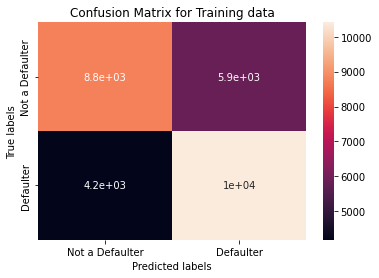

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_dt_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_dt_train_accuracy)

# Calculate Recall
grid_dt_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_dt_train_recall)

# Calculate Precision
grid_dt_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_dt_train_precision)

# Calculate F1_Score
grid_dt_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_dt_train_f1_score)

# Calculate ROC_AUC
grid_dt_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_dt_train_roc_auc_score)

Accuracy : 0.6563462196373588
Recall : 0.7132090983831186
Precision : 0.6398672321593214
F1_Score : 0.674550461687996
ROC_AUC : 0.6564200473465408


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64     14634
           1       0.64      0.71      0.67     14596

    accuracy                           0.66     29230
   macro avg       0.66      0.66      0.66     29230
weighted avg       0.66      0.66      0.66     29230

 
roc_auc_score
0.6564200473465408


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Decision Tree (Grid)',
       'Accuracy':round(grid_dt_train_accuracy,2),
       'Recall':round(grid_dt_train_recall,2),
       'Precision':round(grid_dt_train_precision,2),
       'F1_Score':round(grid_dt_train_f1_score,2),
       'ROC_AUC':round(grid_dt_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[3729 2516]
 [1793 4490]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

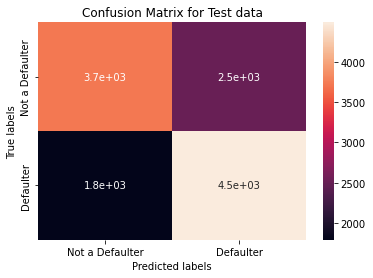

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_dt_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_dt_test_accuracy)

# Calculate Recall
grid_dt_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_dt_test_recall)

# Calculate Precision
grid_dt_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_dt_test_precision)

# Calculate F1_Score
grid_dt_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_dt_test_f1_score)

# Calculate ROC_AUC
grid_dt_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_dt_test_roc_auc_score)

Accuracy : 0.6560504469987228
Recall : 0.7146267706509629
Precision : 0.6408792463602626
F1_Score : 0.6757468583038604
ROC_AUC : 0.6558722324031436


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.68      0.60      0.63      6245
           1       0.64      0.71      0.68      6283

    accuracy                           0.66     12528
   macro avg       0.66      0.66      0.65     12528
weighted avg       0.66      0.66      0.65     12528

 
roc_auc_score
0.6558722324031436


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Decision Tree (Grid)',
       'Accuracy':round(grid_dt_test_accuracy,2),
       'Recall':round(grid_dt_test_recall,2),
       'Precision':round(grid_dt_test_precision,2),
       'F1_Score':round(grid_dt_test_f1_score,2),
       'ROC_AUC':round(grid_dt_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73
3               Decision Tree      0.74    0.76       0.73      0.75     0.74
4        Decision Tree (Grid)      0.66    0.71       0.64      0.68     0.66

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66

The model was created using the Decision Tree GridSearchCV, and the following outcomes were obtained for the training dataset: accuracy of 99.9%, recall of 99.9%, precision of 99.9%, f1-score of 99.9%, and ROC AUC score of 99.9%.

For the testing dataset: Accuracy is 66%, recall is 71%, precision is 64%, the f1-score is 68%, and the ROC AUC score is 66%.

Let's move to our next model.



#### **4th Model - Random Forest** 

In [ ]:
# import package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# ML Model Implementation
# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the Algorithm
rf.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf.predict(X_train)
test_class_preds = rf.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9994184057475197
The accuracy on test dataset is 0.8295019157088123


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[14623    11]
 [    6 14590]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

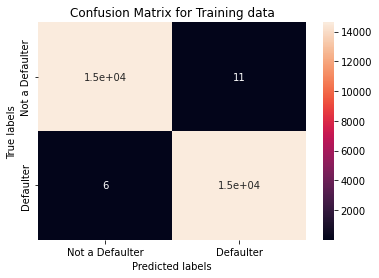

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
rf_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",rf_train_accuracy)

# Calculate Recall
rf_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",rf_train_recall)

# Calculate Precision
rf_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",rf_train_precision)

# Calculate F1_Score
rf_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",rf_train_f1_score)

# Calculate ROC_AUC
rf_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",rf_train_roc_auc_score)

Accuracy : 0.9994184057475197
Recall : 0.9995889284735544
Precision : 0.9992466269433601
F1_Score : 0.9994177483988081
ROC_AUC : 0.9994186271450729


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14634
           1       1.00      1.00      1.00     14596

    accuracy                           1.00     29230
   macro avg       1.00      1.00      1.00     29230
weighted avg       1.00      1.00      1.00     29230

 
roc_auc_score
0.9994186271450729


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Random Forest',
       'Accuracy':round(rf_train_accuracy,2),
       'Recall':round(rf_train_recall,2),
       'Precision':round(rf_train_precision,2),
       'F1_Score':round(rf_train_f1_score,2),
       'ROC_AUC':round(rf_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5292  953]
 [1183 5100]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

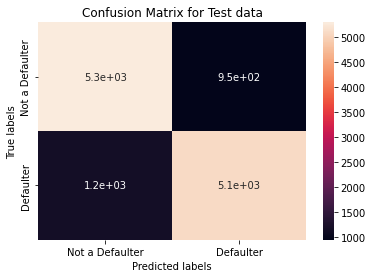

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
rf_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",rf_test_accuracy)

# Calculate Recall
rf_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",rf_test_recall)

# Calculate Precision
rf_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",rf_test_precision)

# Calculate F1_Score
rf_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",rf_test_f1_score)

# Calculate ROC_AUC
rf_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",rf_test_roc_auc_score)

Accuracy : 0.8295019157088123
Recall : 0.8117141492917396
Precision : 0.842557409548984
F1_Score : 0.8268482490272373
ROC_AUC : 0.8295560338132038


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      6245
           1       0.84      0.81      0.83      6283

    accuracy                           0.83     12528
   macro avg       0.83      0.83      0.83     12528
weighted avg       0.83      0.83      0.83     12528

 
roc_auc_score
0.8295560338132038


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Random Forest',
       'Accuracy':round(rf_test_accuracy,2),
       'Recall':round(rf_test_recall,2),
       'Precision':round(rf_test_precision,2),
       'F1_Score':round(rf_test_f1_score,2),
       'ROC_AUC':round(rf_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73
3               Decision Tree      0.74    0.76       0.73      0.75     0.74
4        Decision Tree (Grid)      0.66    0.71       0.64      0.68     0.66
5               Random Forest      0.83    0.81       0.84      0.83     0.83

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00

The model was created using the Random Forest algorithm , and the following outcomes were obtained for the training dataset: accuracy of 99.9%, recall of 99.9%, precision of 99.9%, f1-score of 99.9%, and ROC AUC score of 99.9%.

For the testing dataset: Accuracy is 83%, recall is 81%, precision is 84%, the f1-score is 83%, and the ROC AUC score is 83%.



Before moving on to the next models, let's try adjusting some hyperparameters to see if our model performs better.

Hyperparameter tuning is the process of choosing the best hyperparameters for a learning algorithm. A hyperparameter whose value is set prior to learning is referred to as a model argument. Hyperparameter tuning is essential for the success of machine learning algorithms.

* <b>Using GridSearch CV</b>
By looping through predefined hyperparameters, GridSearch CV makes it simpler to fit the model to the training set. As a result, we can ultimately select the best hyperparameters from the list

##### Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees

# making grid
n_estimators = [150,200]

# Maximum depth of trees
max_depth = [40,50]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [50,100]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
grid_rf = GridSearchCV(estimator=rf_model,param_grid = param_dict, cv = 3, verbose=3, scoring='recall')

# Fit the Algorithm
grid_rf.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = grid_rf.predict(X_train)
test_class_preds = grid_rf.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=150;, score=0.740 total time=   4.9s
[CV 2/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=150;, score=0.732 total time=   4.8s
[CV 3/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=150;, score=0.742 total time=   4.7s
[CV 1/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=0.733 total time=   6.4s
[CV 2/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=0.738 total time=   7.2s
[CV 3/3] END max_depth=40, min_samples_leaf=50, min_samples_split=50, n_estimators=200;, score=0.741 total time=   8.8s
[CV 1/3] END max_depth=40, min_samples_leaf=50, min_samples_split=100, n_estimators=150;, score=0.735 total time=   5.7s
[CV 2/3] END max_depth=40, min_samples_leaf=50, min_samples_split=100, n_estimators=150;, score=0.

In [ ]:
print("Best: %f using %s" % (grid_rf.best_score_, grid_rf.best_params_))

Best: 0.739175 using {'max_depth': 50, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7892234006158056
The accuracy on test data is  0.7745051085568327


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[12010  2624]
 [ 3537 11059]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

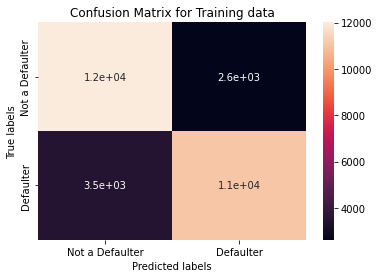

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_rf_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_rf_train_accuracy)

# Calculate Recall
grid_rf_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_rf_train_recall)

# Calculate Precision
grid_rf_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_rf_train_precision)

# Calculate F1_Score
grid_rf_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_rf_train_f1_score)

# Calculate ROC_AUC
grid_rf_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_rf_train_roc_auc_score)

Accuracy : 0.7892234006158056
Recall : 0.7576733351603179
Precision : 0.8082291895052255
F1_Score : 0.7821351532939637
ROC_AUC : 0.7891824377045268


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80     14634
           1       0.81      0.76      0.78     14596

    accuracy                           0.79     29230
   macro avg       0.79      0.79      0.79     29230
weighted avg       0.79      0.79      0.79     29230

 
roc_auc_score
0.7891824377045268


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'Random Forest (Grid)',
       'Accuracy':round(grid_rf_train_accuracy,2),
       'Recall':round(grid_rf_train_recall,2),
       'Precision':round(grid_rf_train_precision,2),
       'F1_Score':round(grid_rf_train_f1_score,2),
       'ROC_AUC':round(grid_rf_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00
6        Random Forest (Grid)      0.79    0.76       0.81      0.78     0.79

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[4969 1276]
 [1549 4734]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

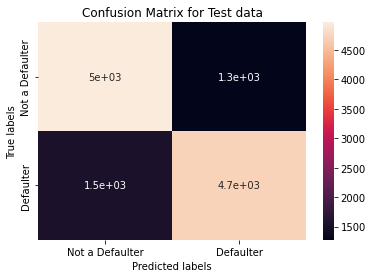

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_rf_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_rf_test_accuracy)

# Calculate Recall
grid_rf_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_rf_test_recall)

# Calculate Precision
grid_rf_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_rf_test_precision)

# Calculate F1_Score
grid_rf_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_rf_test_f1_score)

# Calculate ROC_AUC
grid_rf_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_rf_test_roc_auc_score)

Accuracy : 0.7745051085568327
Recall : 0.7534617221072736
Precision : 0.7876871880199667
F1_Score : 0.7701944195883835
ROC_AUC : 0.77456913167013


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6245
           1       0.79      0.75      0.77      6283

    accuracy                           0.77     12528
   macro avg       0.78      0.77      0.77     12528
weighted avg       0.78      0.77      0.77     12528

 
roc_auc_score
0.77456913167013


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'Random Forest (Grid)',
       'Accuracy':round(grid_rf_test_accuracy,2),
       'Recall':round(grid_rf_test_recall,2),
       'Precision':round(grid_rf_test_precision,2),
       'F1_Score':round(grid_rf_test_f1_score,2),
       'ROC_AUC':round(grid_rf_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73
3               Decision Tree      0.74    0.76       0.73      0.75     0.74
4        Decision Tree (Grid)      0.66    0.71       0.64      0.68     0.66
5               Random Forest      0.83    0.81       0.84      0.83     0.83
6        Random Forest (Grid)      0.77    0.75       0.79      0.77     0.77

The model was created using the Random Forest (Grid) algorithm, and the following outcomes were obtained for the training dataset: accuracy of 79%, recall of 76%, precision of 81%, f1-score of 78%, and ROC AUC score of 79%.

For the testing dataset: Accuracy is 77%, recall is 75%, precision is 79%, the f1-score is 77%, and the ROC AUC score is 77%.

Let's move to out next model.



#### **5th Model - XGBoost Classifier** 

In [ ]:
#import lightgbm and xgboost 
import xgboost as xgb

In [ ]:
# ML Model - Implementation
# Create an instance of the XGBoostClassifier
xg_model = xgb.XGBClassifier()

# Fit the Algorithm
xgb = xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xgb.predict(X_train)
test_class_preds = xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7732124529592884
The accuracy on test data is  0.7674808429118773


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[12093  2541]
 [ 4088 10508]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

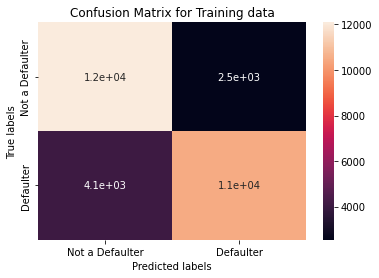

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
xgb_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",xgb_train_accuracy)

# Calculate Recall
xgb_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",xgb_train_recall)

# Calculate Precision
xgb_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",xgb_train_precision)

# Calculate F1_Score
xgb_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",xgb_train_f1_score)

# Calculate ROC_AUC
xgb_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",xgb_train_roc_auc_score)

Accuracy : 0.7732124529592884
Recall : 0.7199232666483968
Precision : 0.8052724346693233
F1_Score : 0.7602098028576596
ROC_AUC : 0.7731432651405166


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78     14634
           1       0.81      0.72      0.76     14596

    accuracy                           0.77     29230
   macro avg       0.78      0.77      0.77     29230
weighted avg       0.78      0.77      0.77     29230

 
roc_auc_score
0.7731432651405166


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'XGBoost',
       'Accuracy':round(xgb_train_accuracy,2),
       'Recall':round(xgb_train_recall,2),
       'Precision':round(xgb_train_precision,2),
       'F1_Score':round(xgb_train_f1_score,2),
       'ROC_AUC':round(xgb_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00
6        Random Forest (Grid)      0.79    0.76       0.81      0.78     0.79
7                     XGBoost      0.77    0.72       0.81      0.76     0.77

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5054 1191]
 [1722 4561]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

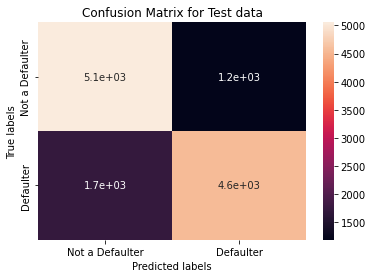

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
xgb_test_accuracy = accuracy_score(y_test, test_class_preds)
print("Accuracy :",xgb_test_accuracy)

# Calculate Recall
xgb_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",xgb_test_recall)

# Calculate Precision
xgb_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",xgb_test_precision)

# Calculate F1_Score
xgb_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",xgb_test_f1_score)

# Calculate ROC_AUC
xgb_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",xgb_test_roc_auc_score)

Accuracy : 0.7674808429118773
Recall : 0.7259271048862008
Precision : 0.7929415855354659
F1_Score : 0.7579559617781471
ROC_AUC : 0.767607267415078


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      6245
           1       0.79      0.73      0.76      6283

    accuracy                           0.77     12528
   macro avg       0.77      0.77      0.77     12528
weighted avg       0.77      0.77      0.77     12528

 
roc_auc_score
0.767607267415078


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'XGBoost',
       'Accuracy':round(xgb_test_accuracy,2),
       'Recall':round(xgb_test_recall,2),
       'Precision':round(xgb_test_precision,2),
       'F1_Score':round(xgb_test_f1_score,2),
       'ROC_AUC':round(xgb_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73
3               Decision Tree      0.74    0.76       0.73      0.75     0.74
4        Decision Tree (Grid)      0.66    0.71       0.64      0.68     0.66
5               Random Forest      0.83    0.81       0.84      0.83     0.83
6        Random Forest (Grid)      0.77    0.75       0.79      0.77     0.77
7                     XGBoost      0.77    0.73       0.79      0.76     0.77

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00
6        Random Forest (Grid)      0.79    0.76       0.81      0.78     0.79
7                     XGBoost      0.77    0.72       0.81      0.76     0.77

The model was created using the XGBoost algorithm, and the following outcomes were obtained for the training dataset: accuracy of 77%, recall of 72%, precision of 81%, f1-score of 76%, and ROC AUC score of 77%.

For the testing dataset: Accuracy is 77%, recall is 73%, precision is 79%, the f1-score is 76%, and the ROC AUC score is 77%.


Before moving on to the next models, let's try adjusting some hyperparameters to see if our model performs better.

Hyperparameter tuning is the process of choosing the best hyperparameters for a learning algorithm. A hyperparameter whose value is set prior to learning is referred to as a model argument. Hyperparameter tuning is essential for the success of machine learning algorithms.

* <b>Using GridSearch CV</b>
By looping through predefined hyperparameters, GridSearch CV makes it simpler to fit the model to the training set. As a result, we can ultimately select the best hyperparameters from the list

##### Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Number of trees
n_estimators = [40,50]

# Maximum depth of trees
max_depth = [4,6]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
grid_xgb = GridSearchCV(estimator=xg_model, param_grid = param_dict, cv = 3, verbose=2, scoring='recall')

grid_xgb = grid_xgb.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = grid_xgb.predict(X_train)
test_class_preds = grid_xgb.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=40; total time=   2.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=40; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=40; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=40; total time=   2.4s
[CV] END max_depth=4, min_s

In [ ]:
print("Best: %f using %s" % (grid_xgb.best_score_, grid_xgb.best_params_))

Best: 0.723075 using {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train, train_class_preds)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7886418063633254
The accuracy on test data is  0.7800127713920817


##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Training dataset

[[12308  2326]
 [ 3852 10744]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

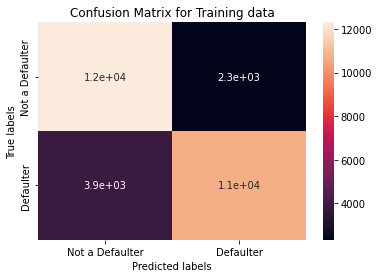

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for training data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_xgb_train_accuracy= accuracy_score(y_train, train_class_preds)
print("Accuracy :",grid_xgb_train_accuracy)

# Calculate Recall
grid_xgb_train_recall = recall_score(y_train, train_class_preds)
print("Recall :",grid_xgb_train_recall)

# Calculate Precision
grid_xgb_train_precision = precision_score(y_train, train_class_preds)
print("Precision :",grid_xgb_train_precision)

# Calculate F1_Score
grid_xgb_train_f1_score = f1_score(y_train, train_class_preds)
print("F1_Score :",grid_xgb_train_f1_score)

# Calculate ROC_AUC
grid_xgb_train_roc_auc_score = roc_auc_score(y_train, train_class_preds)
print("ROC_AUC :",grid_xgb_train_roc_auc_score)

Accuracy : 0.7886418063633254
Recall : 0.7360920800219238
Precision : 0.8220351951032899
F1_Score : 0.7766934142991397
ROC_AUC : 0.7885735786196814


In [ ]:
# roc_auc for training data
print(metrics.classification_report(y_train, train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     14634
           1       0.82      0.74      0.78     14596

    accuracy                           0.79     29230
   macro avg       0.79      0.79      0.79     29230
weighted avg       0.79      0.79      0.79     29230

 
roc_auc_score
0.7885735786196814


In [ ]:
# storing the metric values of the training set metrics in a dataframe
dict1 = {'Model':'XGBoost (Grid)',
       'Accuracy':round(grid_xgb_train_accuracy,2),
       'Recall':round(grid_xgb_train_recall,2),
       'Precision':round(grid_xgb_train_precision,2),
       'F1_Score':round(grid_xgb_train_f1_score,2),
       'ROC_AUC':round(grid_xgb_train_roc_auc_score,2)
       }
training_df = training_df.append(dict1,ignore_index = True)

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00
6        Random Forest (Grid)      0.79    0.76       0.81      0.78     0.79
7                     XGBoost      0.77    0.72       0.81      0.76     0.77
8              XGBoost (Grid)      0.79    0.74       0.82      0.78     0.79

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* For Test dataset

[[5129 1116]
 [1640 4643]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

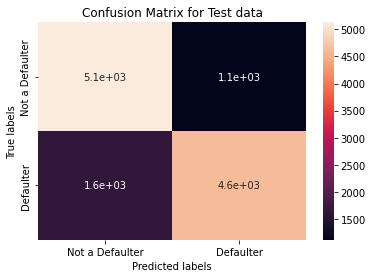

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for test data

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Get all the metrics needed for comparison

# Calculate Accuracy
grid_xgb_test_accuracy= accuracy_score(y_test, test_class_preds)
print("Accuracy :",grid_xgb_test_accuracy)

# Calculate Recall
grid_xgb_test_recall = recall_score(y_test, test_class_preds)
print("Recall :",grid_xgb_test_recall)

# Calculate Precision
grid_xgb_test_precision = precision_score(y_test, test_class_preds)
print("Precision :",grid_xgb_test_precision)

# Calculate F1_Score
grid_xgb_test_f1_score = f1_score(y_test, test_class_preds)
print("F1_Score :",grid_xgb_test_f1_score)

# Calculate ROC_AUC
grid_xgb_test_roc_auc_score = roc_auc_score(y_test, test_class_preds)
print("ROC_AUC :",grid_xgb_test_roc_auc_score)

Accuracy : 0.7800127713920817
Recall : 0.7389781951297151
Precision : 0.8062163570064247
F1_Score : 0.7711343630626142
ROC_AUC : 0.7801376163799095


In [ ]:
# roc_auc for test data
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      6245
           1       0.81      0.74      0.77      6283

    accuracy                           0.78     12528
   macro avg       0.78      0.78      0.78     12528
weighted avg       0.78      0.78      0.78     12528

 
roc_auc_score
0.7801376163799095


In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2 = {'Model':'XGBoost (Grid)',
       'Accuracy':round(grid_xgb_test_accuracy,2),
       'Recall':round(grid_xgb_test_recall,2),
       'Precision':round(grid_xgb_test_precision,2),
       'F1_Score':round(grid_xgb_test_f1_score,2),
       'ROC_AUC':round(grid_xgb_test_roc_auc_score,2)
       }
test_df = test_df.append(dict2,ignore_index = True)

In [ ]:
test_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic regression      0.63    0.74       0.61      0.67     0.63
1  Logistic regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.73    0.85       0.69      0.76     0.73
3               Decision Tree      0.74    0.76       0.73      0.75     0.74
4        Decision Tree (Grid)      0.66    0.71       0.64      0.68     0.66
5               Random Forest      0.83    0.81       0.84      0.83     0.83
6        Random Forest (Grid)      0.77    0.75       0.79      0.77     0.77
7                     XGBoost      0.77    0.73       0.79      0.76     0.77
8              XGBoost (Grid)      0.78    0.74       0.81      0.77     0.78

In [ ]:
training_df

Model  Accuracy  Recall  Precision  F1_Score  ROC_AUC
0         Logistic Regression      0.63    0.74       0.61      0.67     0.63
1  Logistic Regression (Grid)      0.63    0.74       0.61      0.67     0.63
2                         KNN      0.82    0.92       0.77      0.84     0.82
3               Decision Tree      1.00    1.00       1.00      1.00     1.00
4        Decision Tree (Grid)      0.66    0.71       0.64      0.67     0.66
5               Random Forest      1.00    1.00       1.00      1.00     1.00
6        Random Forest (Grid)      0.79    0.76       0.81      0.78     0.79
7                     XGBoost      0.77    0.72       0.81      0.76     0.77
8              XGBoost (Grid)      0.79    0.74       0.82      0.78     0.79

The model was created using the XGBoost (Grid) algorithm, and the following outcomes were obtained for the training dataset: accuracy of 79%, recall of 74%, precision of 82%, f1-score of 78%, and ROC AUC score of 79%.

For the testing dataset: Accuracy is 78%, recall is 74%, precision is 81%, the f1-score is 77%, and the ROC AUC score is 78%.



## **8. Final Verdict**

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I'd like to go with Recall because precision is important for reducing false positives. F1_score is being considered in situations where minimizing both is necessary. The definition of a false positive is when the model predicted that a customer would default but the customer did not. However, our model predicts that it will default, so there is a good chance that it will not default immediately but rather over time. 

Again, "false negative" means that the model will say that a customer won't default, but the customer did. We will have a problem with that. Therefore, we must reduce the number of false negatives in that case. and false positives, we must raise the precision and recall scores, which should directly and positively affect the f1_score. As a result, the recall will outperform precision in our situation. Therefore, the f1_score and recall ought to be moderate.

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Since the data is different from that of where real-time booking must be completed more quickly, I chose the Random Forest model because, first and foremost, I need a better prediction for the number of rented bikes. Additionally, time is not a constraint because the data is different. To increase precision, a variety of linear models, decision trees, Random Forest, and Gradient Boost methods were utilized. I'd like to compare the metrics for their evaluation that are provided here.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

Training set                                             \
                        Model Accuracy Recall Precision F1_Score ROC_AUC   
0         Logistic Regression     0.63   0.74      0.61     0.67    0.63   
1  Logistic Regression (Grid)     0.63   0.74      0.61     0.67    0.63   
2                         KNN     0.82   0.92      0.77     0.84    0.82   
3               Decision Tree     1.00   1.00      1.00     1.00    1.00   
4        Decision Tree (Grid)     0.66   0.71      0.64     0.67    0.66   
5               Random Forest     1.00   1.00      1.00     1.00    1.00   
6        Random Forest (Grid)     0.79   0.76      0.81     0.78    0.79   
7                     XGBoost     0.77   0.72      0.81     0.76    0.77   
8              XGBoost (Grid)     0.79   0.74      0.82     0.78    0.79   

                     Test set                                             
                        Model Accuracy Recall Precision F1_Score ROC_AUC  
0         Logistic regression     0.63   0.74      0.61     0.67    0.63  
1  Logistic regression (Grid)     0.63   0.74      0.61     0.67    0.63  
2                         KNN     0.73   0.85      0.69     0.76    0.73  
3               Decision Tree     0.74   0.76      0.73     0.75    0.74  
4        Decision Tree (Grid)     0.66   0.71      0.64     0.68    0.66  
5               Random Forest     0.83   0.81      0.84     0.83    0.83  
6        Random Forest (Grid)     0.77   0.75      0.79     0.77    0.77  
7                     XGBoost     0.77   0.73      0.79     0.76    0.77  
8              XGBoost (Grid)     0.78   0.74      0.81     0.77    0.78

For the following reasons, I would choose Random Forest.
* One of the best Recall scores for the Test Set (0.81) and the Training Set (0.99)
* Test Accuracy and training Accuracy were the highest.
* Test Precision and training precision were the highest.
* Test ROC AUC and Training ROC AUC are the highest.
* Lowest Overfit (the Train metrics is more comparable to the Test metrics)
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.9 MB/s eta 0:00:00


treeexplainer

In [ ]:
# package used to calculate Shap values
import shap 

# Create object that can calculate shap values
explainer = shap.Explainer(rf)

# Calculate Shap values
shap_values = explainer(X_test)

One way to visually display SHAP values is with a force plot. Similar to a waterfall plot that shows the contribution of the geological features and their relationship to one another in a straight line, these provide us with information.

Force and waterfall plots make it simple to interpret individual predictions. To comprehend how our model generally makes predictions, we must combine the SHAP values. One way to do this is by using a decision plot.

As can be seen, the plot has ten lines, one for each abalone. They all begin with the same base value of -1.94 and end with their final predicted number of rings. The movement on the x-axis as you ascend from that feature on the y-axis is indicated by the SHAP value for that feature. In the end, this gives us the same data as a waterfall plot, but we can now see it for multiple observations.

With just ten observations, we can already see some trends. At the top of the chart, for instance, some of the lines appear to zigzag. The shucked weight is predicted to be positive (SHAP), while the shell weight and total weight are predicted to be negative (SHAP). To put it another way, these features have different effects on the prediction. We will notice that this is the situation for the model as a whole when we examine plot 5—beeswarm.

The fact that we are unable to immediately visualize all of the SHAP values is a limitation of this outline. As the number of observations grows, it will become too cluttered, making it hard to understand how the model works. The SHAP values can only be explained for a small number of observations.

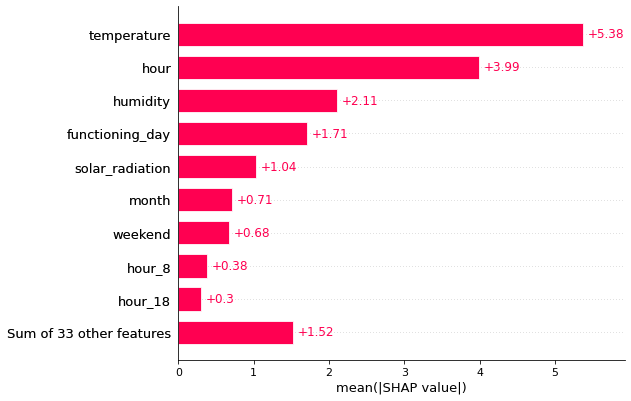

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to combine the values is with a mean SHAP plot. For each feature, we compute the absolute SHAP value mean for each observation. We don't believe that positive and negative qualities should balance one another, so we accept the obvious qualities. At the end, we have the bar graph above. We can see that the shell weight feature, which has the largest mean SHAP, is represented by just one bar.

Features with large mean SHAP values typically have large positive and negative SHAP values. To put it another way, these are the features that have a significant impact on the model's predictions. The use of this plot is comparable to that of a feature importance plot. Specifically, to emphasize characteristics that are essential to the predictions made by a model. Problematically, it reveals nothing about the nature of the relationship between features and the target variable.

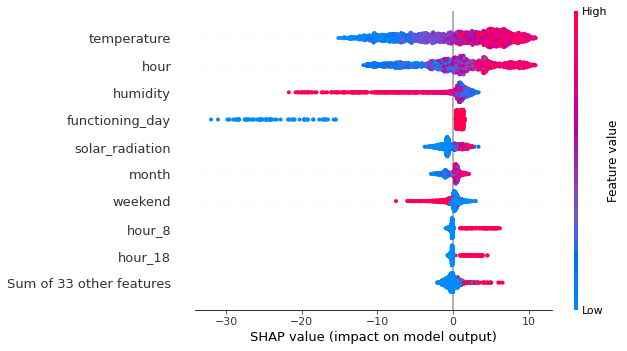

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final group is the beeswarm plot. This is a plot of all the SHAP values, as shown in Figure. The values are grouped by the y-axis features. The color is not entirely determined by the value of a comparable element for each group; for instance, elements with higher values are redder. The order of the features is determined by the mean SHAP values.

This plot addresses some of the issues from the previous ones. In contrast to the standard plot, we can plot each perception with distinct translations. It can be utilized to draw attention to crucial relationships, such as mean SHAP. We can also begin to understand the nature of these relationships. 

##**9. Summary and Conclusion**

#### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

####**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project.***